# PROBLEM STATEMENT

# Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

# PROJECT ON:
-    Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [193]:
#!pip install imblearn

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as ms

import warnings
warnings.filterwarnings('ignore')

In [195]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


# ANALYSING RAW DATA

In [196]:
df.shape

(907, 27)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [198]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [199]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

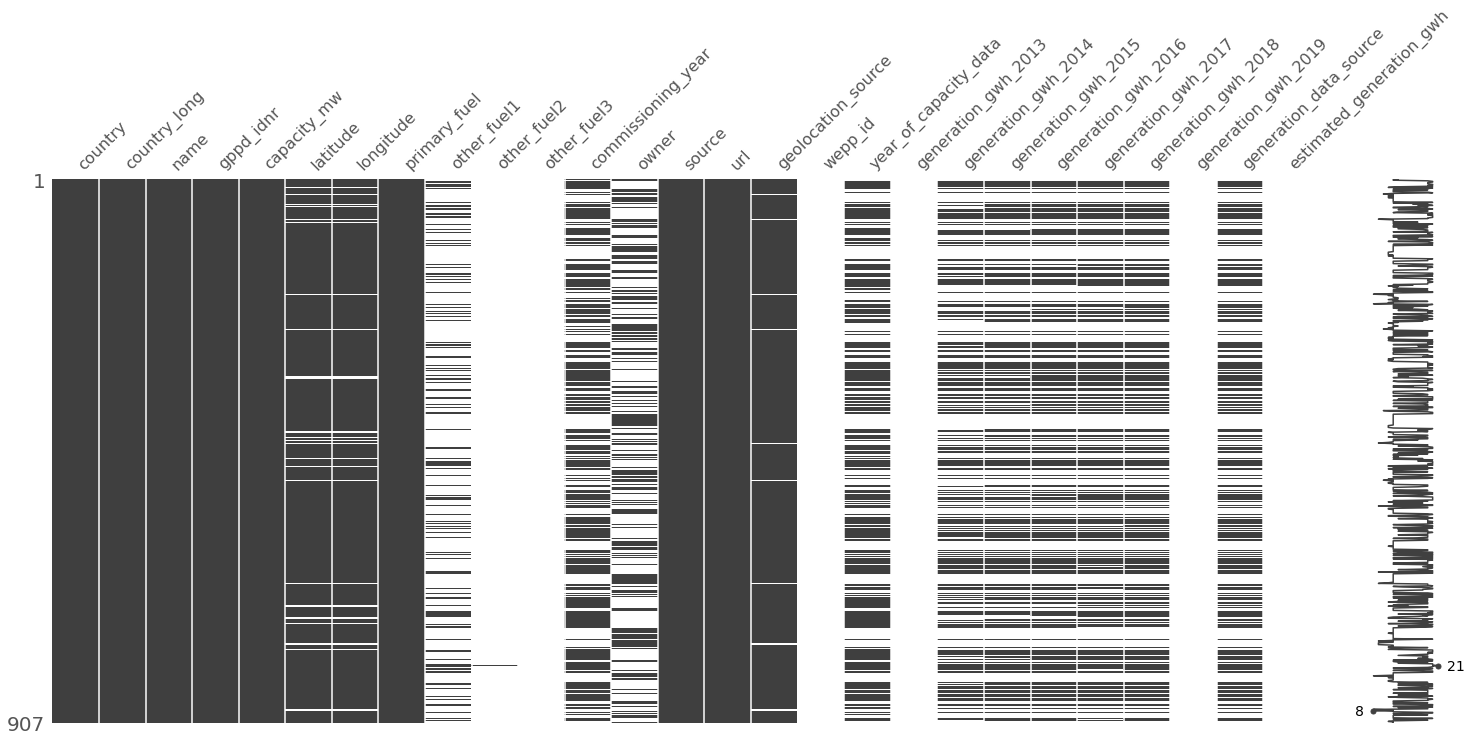

In [200]:
#plotting missing number confirmation

ms.matrix(df);

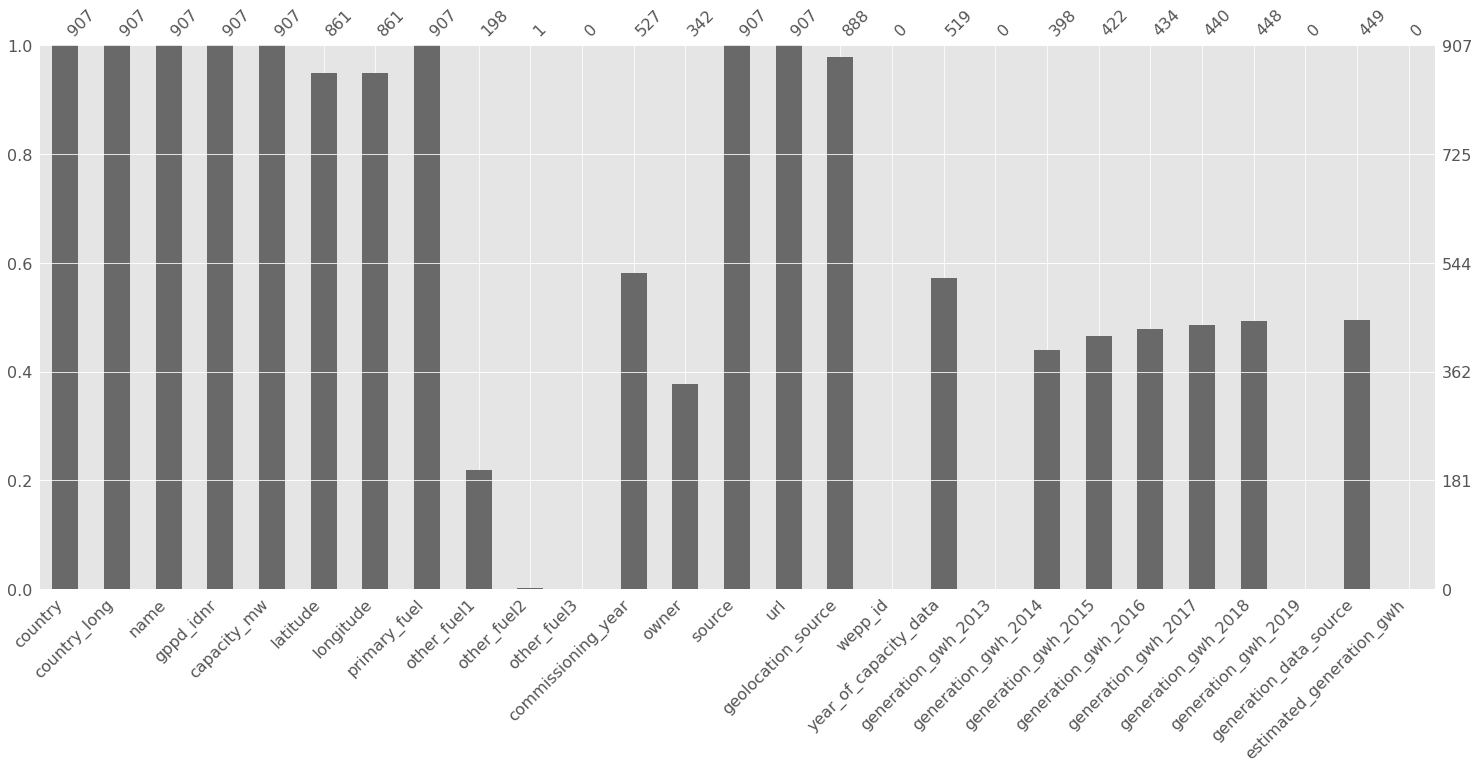

In [201]:
ms.bar(df);

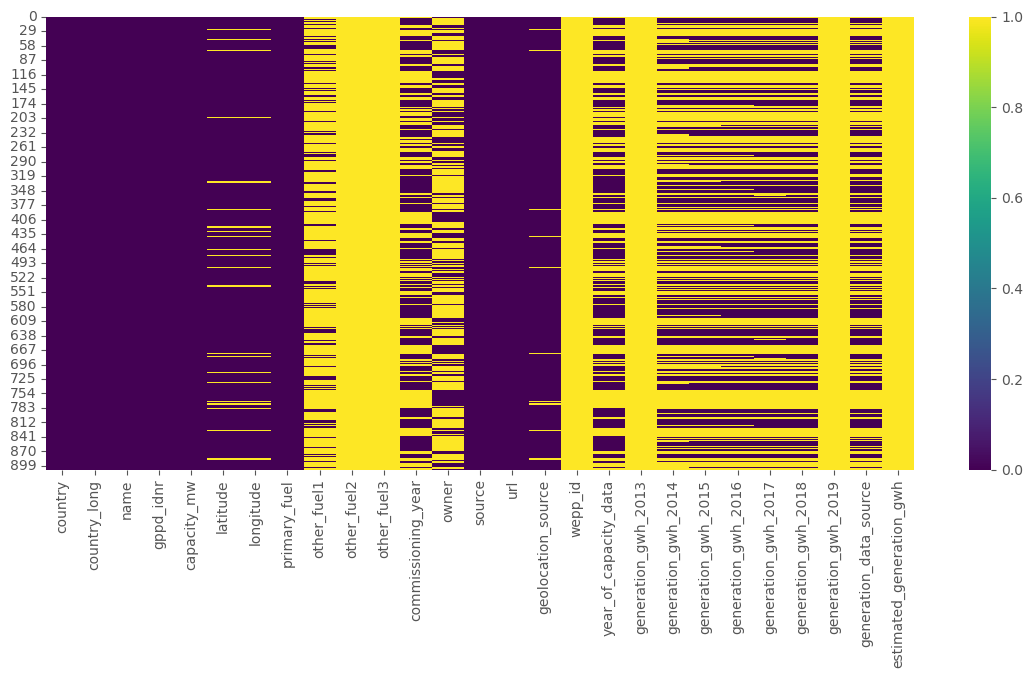

In [202]:
plt.figure(figsize=(14,6),dpi=100)
sns.heatmap(df.isna(),cmap='viridis');

In [203]:
df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

country                   object
country_long              object
name                      object
gppd_idnr                 object
primary_fuel              object
other_fuel1               object
other_fuel2               object
owner                     object
source                    object
url                       object
geolocation_source        object
generation_data_source    object
dtype: object

In [204]:
df.dtypes[df.dtypes != 'object']

capacity_mw                 float64
latitude                    float64
longitude                   float64
other_fuel3                 float64
commissioning_year          float64
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
estimated_generation_gwh    float64
dtype: object

In [205]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


# As we observe that in generation _gwh values od std is more than mean which make no sense and also there is huge jump in the percentile from 75% to 100% as compared to 50% to 75%.

In [206]:
df.drop(columns=['estimated_generation_gwh','wepp_id','owner','other_fuel3','other_fuel2','other_fuel1','generation_gwh_2013','generation_gwh_2019'],inplace=True)

In [207]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [208]:
df.shape

(907, 19)

In [209]:
df.drop(columns=['country','country_long','name','gppd_idnr','url','generation_data_source'],inplace=True)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [210]:
df.shape

(907, 13)

In [211]:
#CHECKING NULL VALUES FOR COMMISSIONING YEARS
df.commissioning_year.isnull().sum()

380

In [212]:
df.commissioning_year.isnull().sum()/907*100

41.89636163175303

# 42 percent of the data is missing from commissioning year and since the commissioning year is fixed for every power plant ,its hard to predict exact commission date exactly by any means and putting any value inplace of this is absurd so we delete this column.

In [213]:
df.drop(columns=['commissioning_year'],inplace=True)

In [214]:
df.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

# Checking for unique categories in the categorical columns with null values

In [215]:
df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

primary_fuel          object
source                object
geolocation_source    object
dtype: object

# checking geolocation_source

In [216]:
df.geolocation_source.unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

 3 unique category available and 19 nan value present as evident from above

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

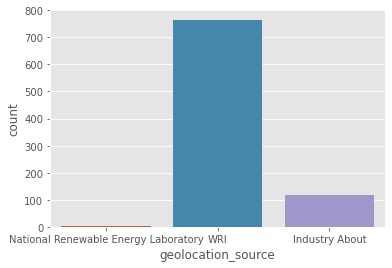

In [217]:
sns.countplot(df.geolocation_source)

In [218]:
df.geolocation_source.isnull().sum()/908*100

2.092511013215859

2.09 percent of data is missing

In [219]:
# most frequently occuring value.
df.geolocation_source.mode() 

0    WRI
Name: geolocation_source, dtype: object

In [220]:
#checking the % share of most frequently occuring value.
(df['geolocation_source'] == 'WRI').sum()/df.geolocation_source.count()*100

86.14864864864865

more than 86% of data conatain WRI so we can fill the nan value with WRI.

In [221]:
#fillinig the null value with mode

df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [222]:
df.geolocation_source.isnull().sum()/908*100

0.0

all null values are filled in geolocation_source

# Checking for Null values in continuous / discrete columns.

In [223]:
df.select_dtypes(exclude = object).isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [224]:
df.describe()

,capacity_mw,latitude,longitude,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


# As we observe that in generation _gwh values od std is more than mean which make no sense and also there is huge jump in the percentile from 75% to 100% as compared to 50% to 75%.so replancing the null value with mean will lead to absurd result so in this case KNN method suits.

In [225]:
from sklearn.impute import KNNImputer

In [226]:
imp = KNNImputer(n_neighbors=4)
df[['capacity_mw','generation_gwh_2014']] = imp.fit_transform(df[['capacity_mw','generation_gwh_2014']])
df[['capacity_mw','generation_gwh_2014']].isnull().sum()

capacity_mw            0
generation_gwh_2014    0
dtype: int64

In [227]:
imp = KNNImputer(n_neighbors=4)
df[['capacity_mw','generation_gwh_2015']] = imp.fit_transform(df[['capacity_mw','generation_gwh_2015']])
df[['capacity_mw','generation_gwh_2015']].isnull().sum()

capacity_mw            0
generation_gwh_2015    0
dtype: int64

In [228]:
imp = KNNImputer(n_neighbors=4)
df[['capacity_mw','generation_gwh_2016']] = imp.fit_transform(df[['capacity_mw','generation_gwh_2016']])
df[['capacity_mw','generation_gwh_2016']].isnull().sum()

capacity_mw            0
generation_gwh_2016    0
dtype: int64

In [229]:
imp = KNNImputer(n_neighbors=4)
df[['capacity_mw','generation_gwh_2017']] = imp.fit_transform(df[['capacity_mw','generation_gwh_2017']])
df[['capacity_mw','generation_gwh_2017']].isnull().sum()

capacity_mw            0
generation_gwh_2017    0
dtype: int64

In [230]:
imp = KNNImputer(n_neighbors=4)
df[['capacity_mw','generation_gwh_2018']] = imp.fit_transform(df[['capacity_mw','generation_gwh_2018']])
df[['capacity_mw','generation_gwh_2018']].isnull().sum()

capacity_mw            0
generation_gwh_2018    0
dtype: int64

In [231]:
df.drop(columns=('year_of_capacity_data'),inplace=True)

In [232]:
df.drop(columns=('source'),inplace=True)

In [233]:
df.shape

(907, 10)

In [234]:
#for latitude and longitude
imp = KNNImputer(n_neighbors=2)
df[['latitude','longitude']] = imp.fit_transform(df[['latitude','longitude']])
df[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

In [235]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

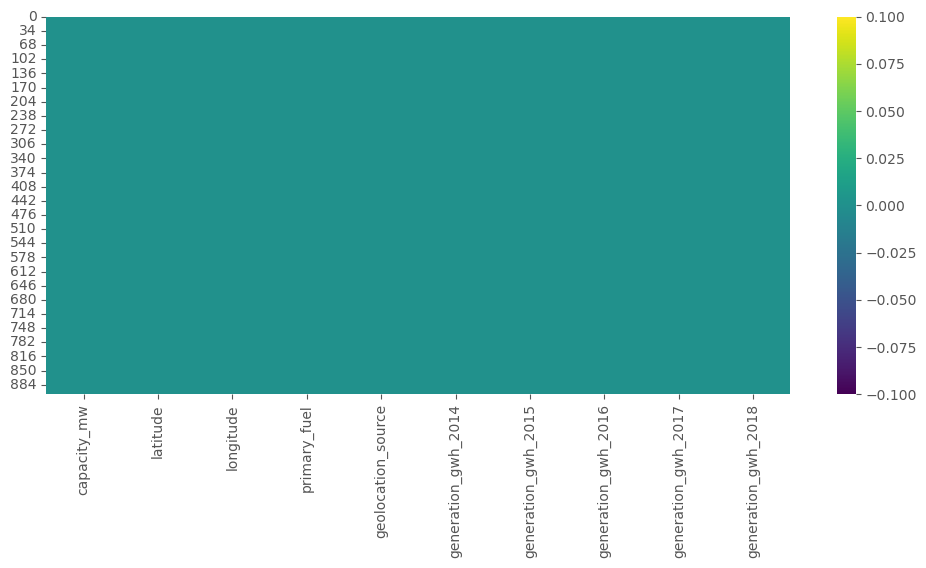

In [236]:
plt.figure(figsize=(12,5),dpi=100)
sns.heatmap(df.isna(),cmap='viridis');

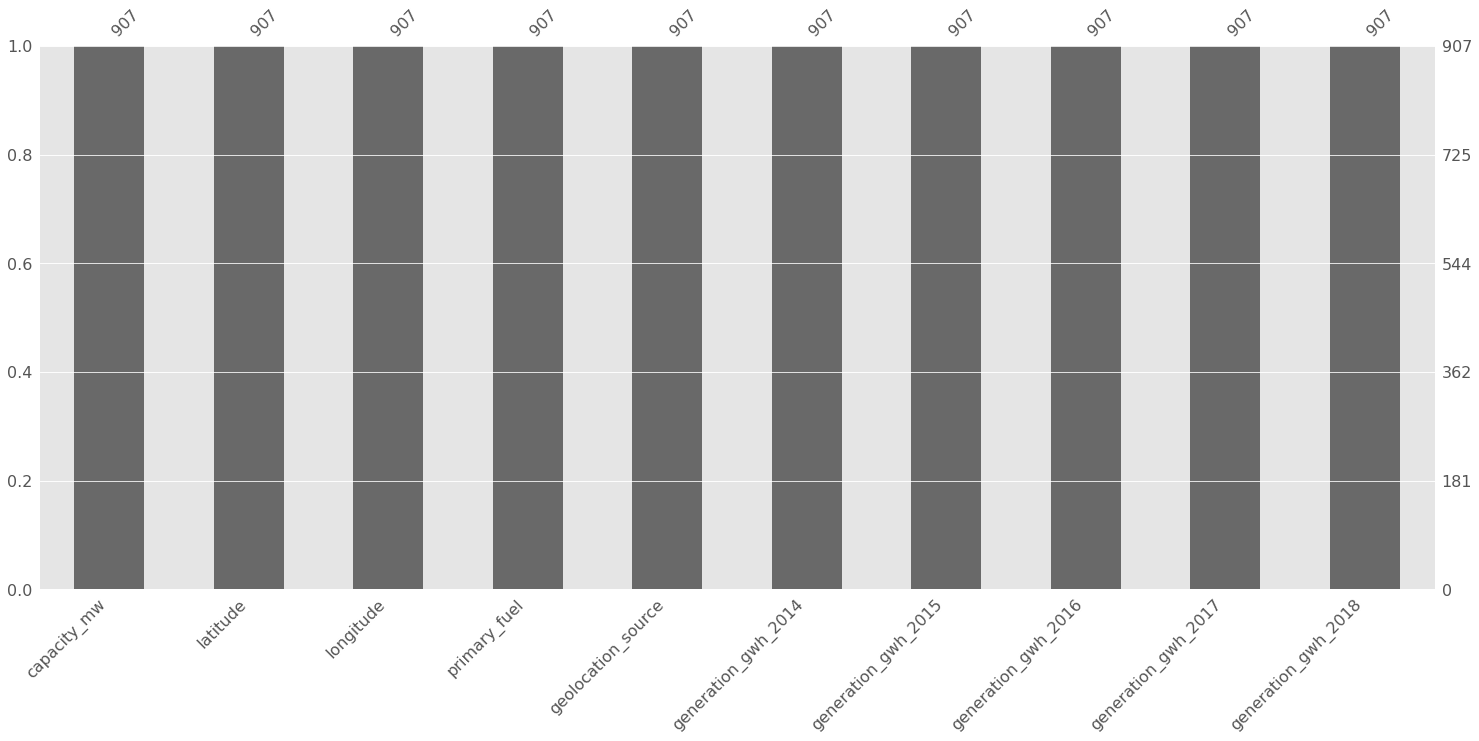

In [237]:
ms.bar(df);

# ALL NULL VALUES HAS BEEN SUCCESSFULLY FILLEDUP.

# EXPLORATORY DATA ANALYSIS

# Analyzing the continuous data type Target column

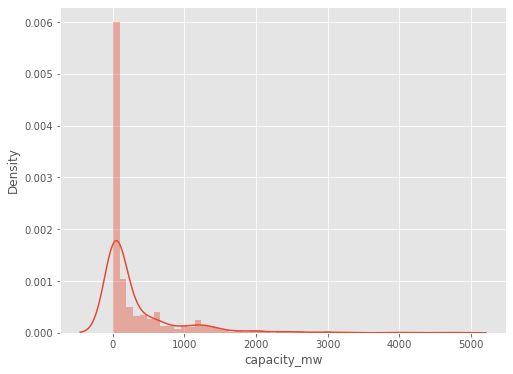

In [238]:
#capacity_mw
plt.figure(figsize=(8,6))
sns.distplot(df.capacity_mw);

In [239]:
df.capacity_mw.skew()

3.123576153626497

showing right skewed

# Analyzing Feature columns with Continuous Data.

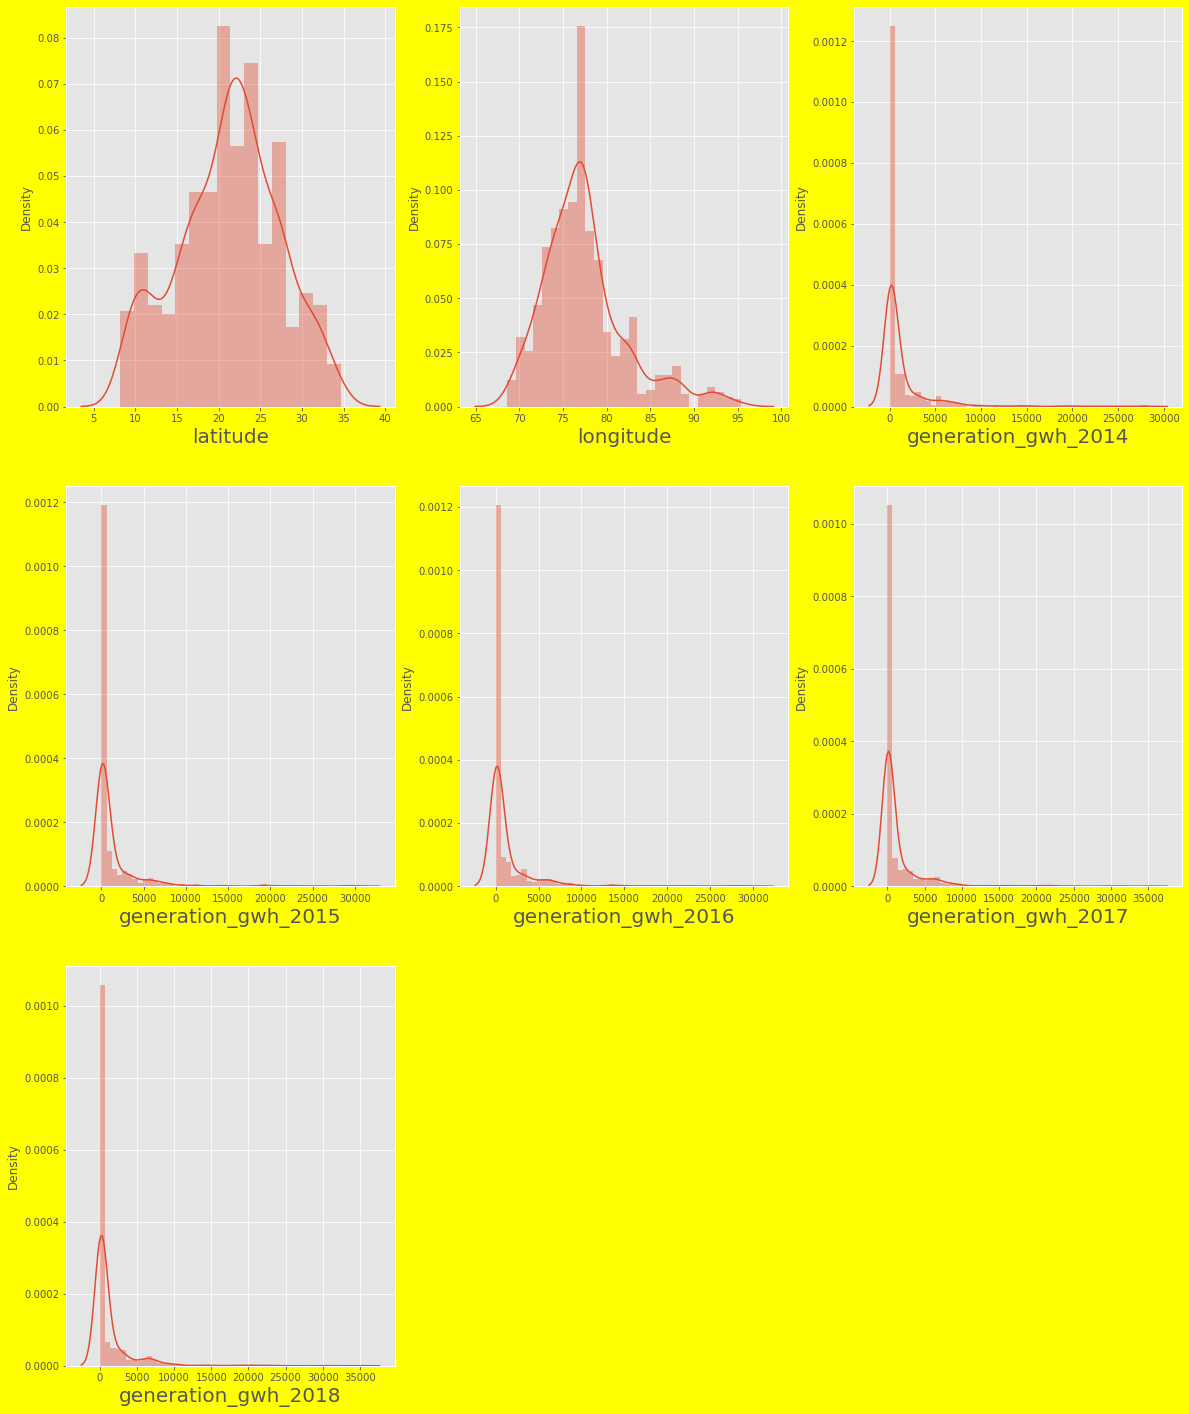

In [240]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnum=1
for col in df.drop(columns=['capacity_mw','primary_fuel','geolocation_source']):
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

almost all the graph are right skewed which means outliers are present.

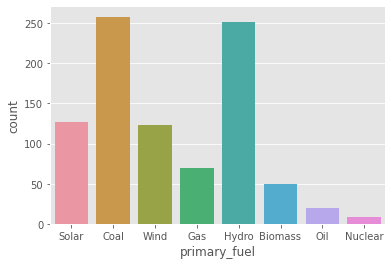

In [241]:
#Visualizing the types of fuel 
sns.countplot(df['primary_fuel'])
plt.show()

# power generation = coal > hydro > solar > wind

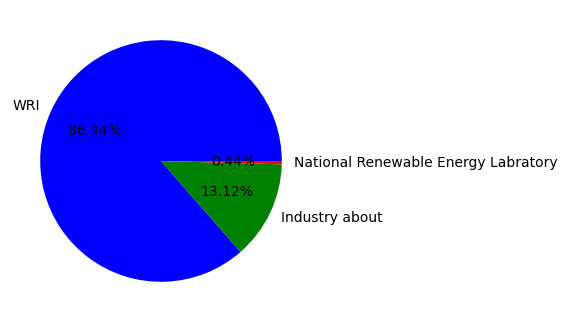

In [242]:
#Visualizing the counts of owner
labels = ['WRI', 'Industry about', 'National Renewable Energy Labratory']
fig, ax = plt.subplots(dpi=100)
cl = ['blue','green','red']
plt.legend
plt.pie(df['geolocation_source'].value_counts(),labels = labels,radius =1, autopct = '%1.2f%%', shadow=False,colors=cl)
plt.show()

# Comparing target variable [capacity _mw] with rest of the features

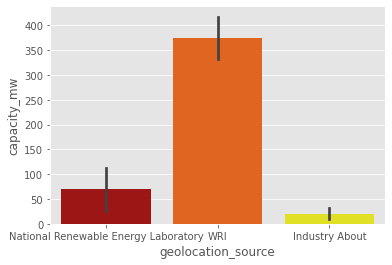

In [243]:
#Visualize relationship between source and capacity_mw
sns.barplot(x='geolocation_source', y='capacity_mw', data = df, palette = 'hot')
plt.show()

WRI has provided highest capacity of around 370mw and then national renewable energy.

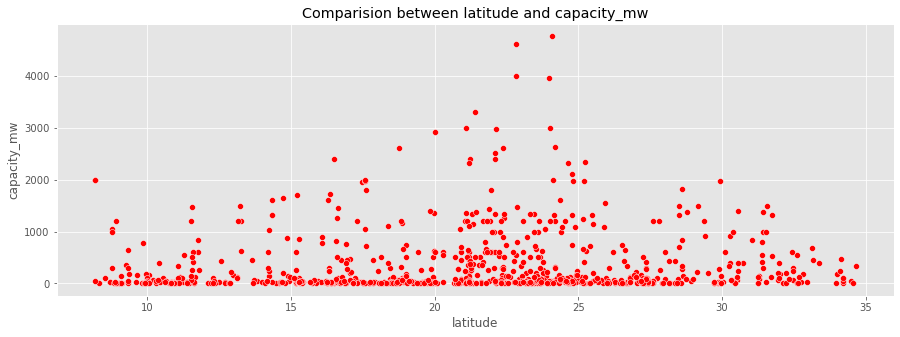

In [244]:
#capacity_mw vs Latitude
plt.figure(figsize = (15,5))
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot('latitude', 'capacity_mw', data = df,color='red')
plt.show()

it has been observed that inbetween 20 to 25 degree latitude power generation capacity is moreas few power plant are able to produce
more than 4000mw power.

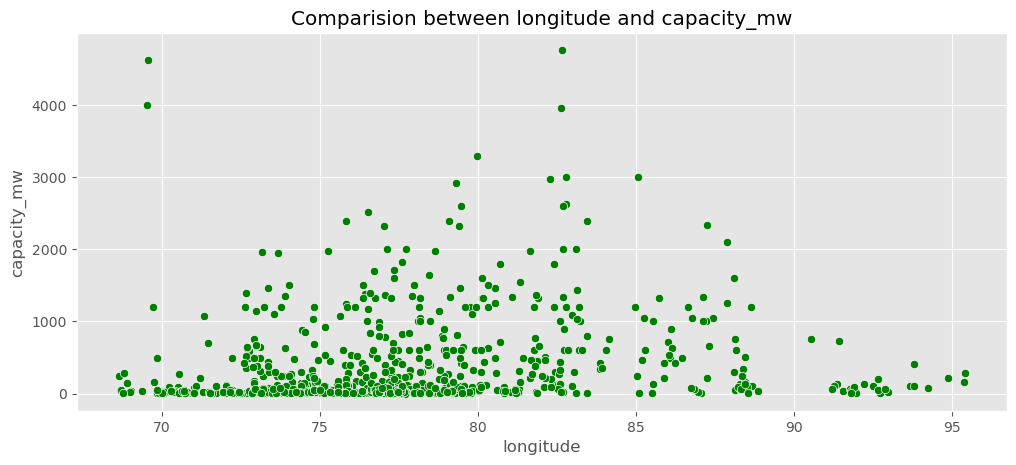

In [245]:
#capacity_mw vs Longitude
plt.figure(figsize = (12,5),dpi=100)
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.scatterplot('longitude', 'capacity_mw', data = df,color='green')
plt.show()

capacity of power generation is more in between 70 to 75 degree longitude which describes the favourable condition for power generation

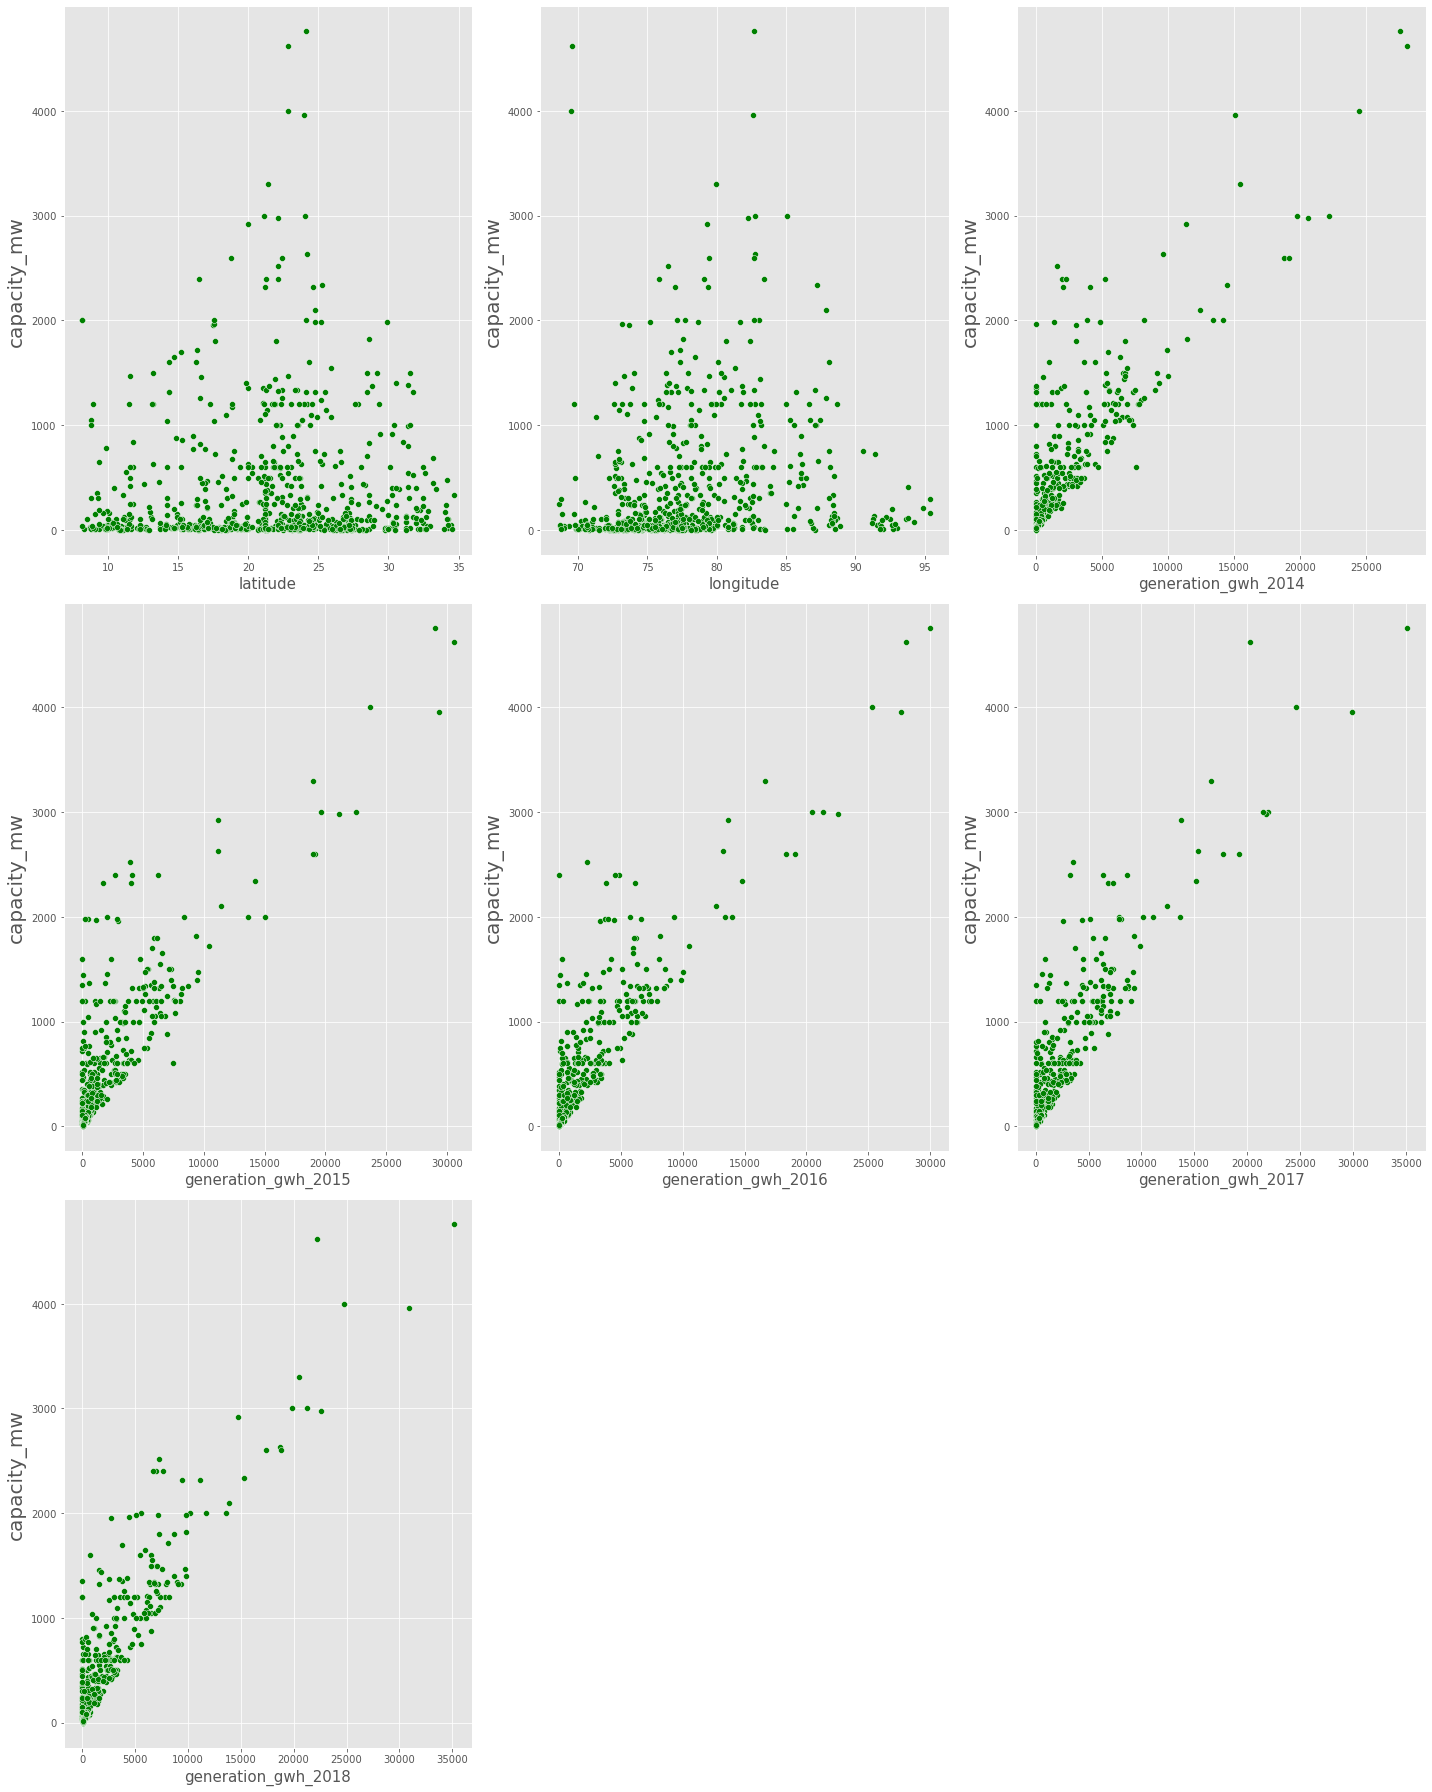

In [246]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['capacity_mw']
X =  df.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.scatterplot(X[col],y,color='green')
        plt.xlabel(col,fontsize=15)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

# a perfect linear relationship exists among capacity and each generation year.

<Figure size 576x432 with 0 Axes>

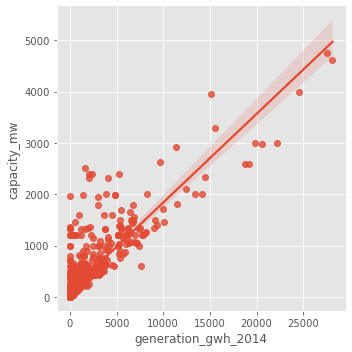

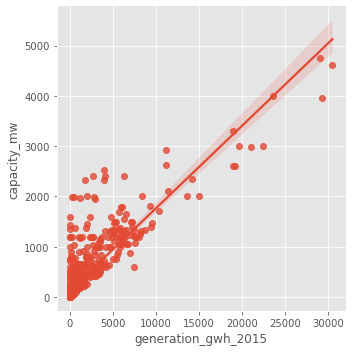

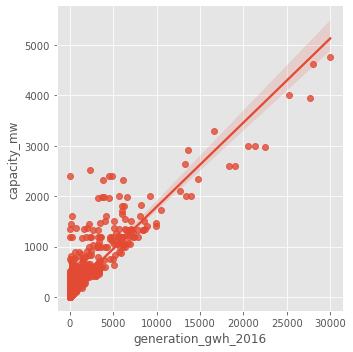

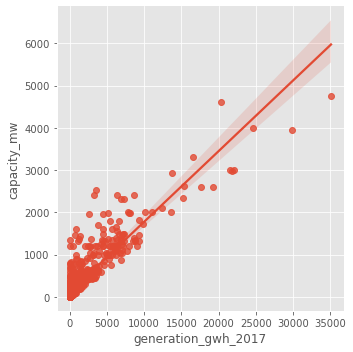

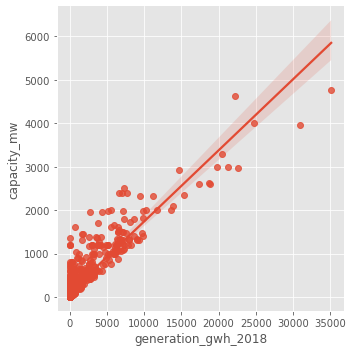

In [247]:
plt.figure(figsize=(8,6),facecolor='white')
X = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for col in X:
    sns.lmplot(x = col,y = 'capacity_mw',data = df)

# LET US COMPARE PRIMARY FUEL(TARGET VARIABLE) WITH OTHER FEATURES AND ITS RELATION WITH THEM

In [248]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

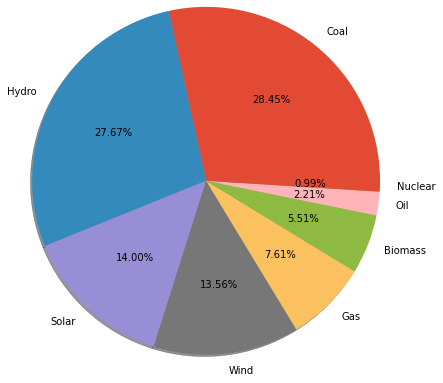

In [249]:
labels = 'Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig, ax = plt.subplots()
ax.pie(df['primary_fuel'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True)
plt.show()

# observation
- from the above graph we realise that coal still provides highest contribution in power generation globally which creates environmental problem
worldwide.but renewable power like hydro, solar, wind also starts contributing more and more in power generation which is excellent 
for environment.
- we also observe that the contribution of nuclear energy is still very low in production of energy which is a major source of clean
energy and its source is still need to harness with caution.

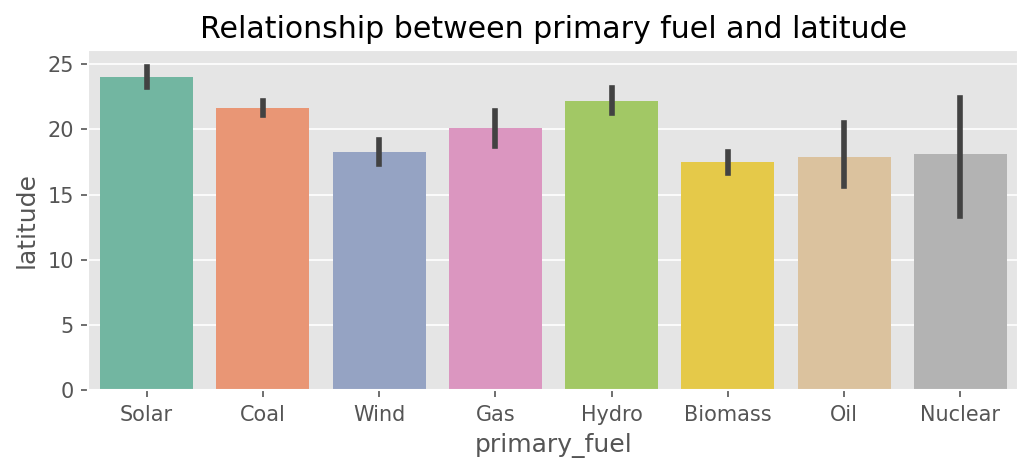

In [250]:
#Let's Visualize how primary fuel is related to latitude of the power plant
plt.figure(figsize = (8,3),dpi=150)
plt.title('Relationship between primary fuel and latitude')
sns.barplot(x = 'primary_fuel', y = 'latitude', data = df, palette = 'Set2')
plt.show()

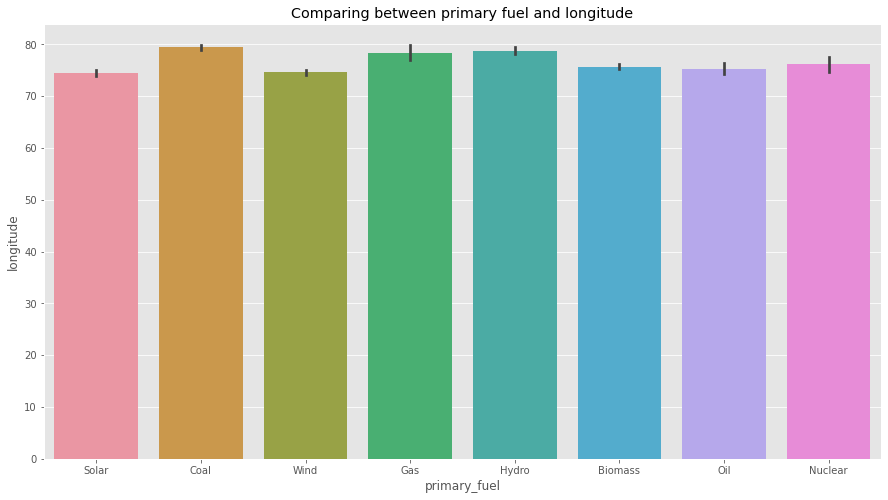

In [251]:
#Let's Visualize how primary fuel is related to longitude of the power plant
plt.figure(figsize = (15,8))
plt.style.use('ggplot')
plt.title('Comparing between primary fuel and longitude')
sns.barplot(x = 'primary_fuel', y = 'longitude', data = df)
plt.show()

# primary_fuel vs Continuous/Discrete Data Columns

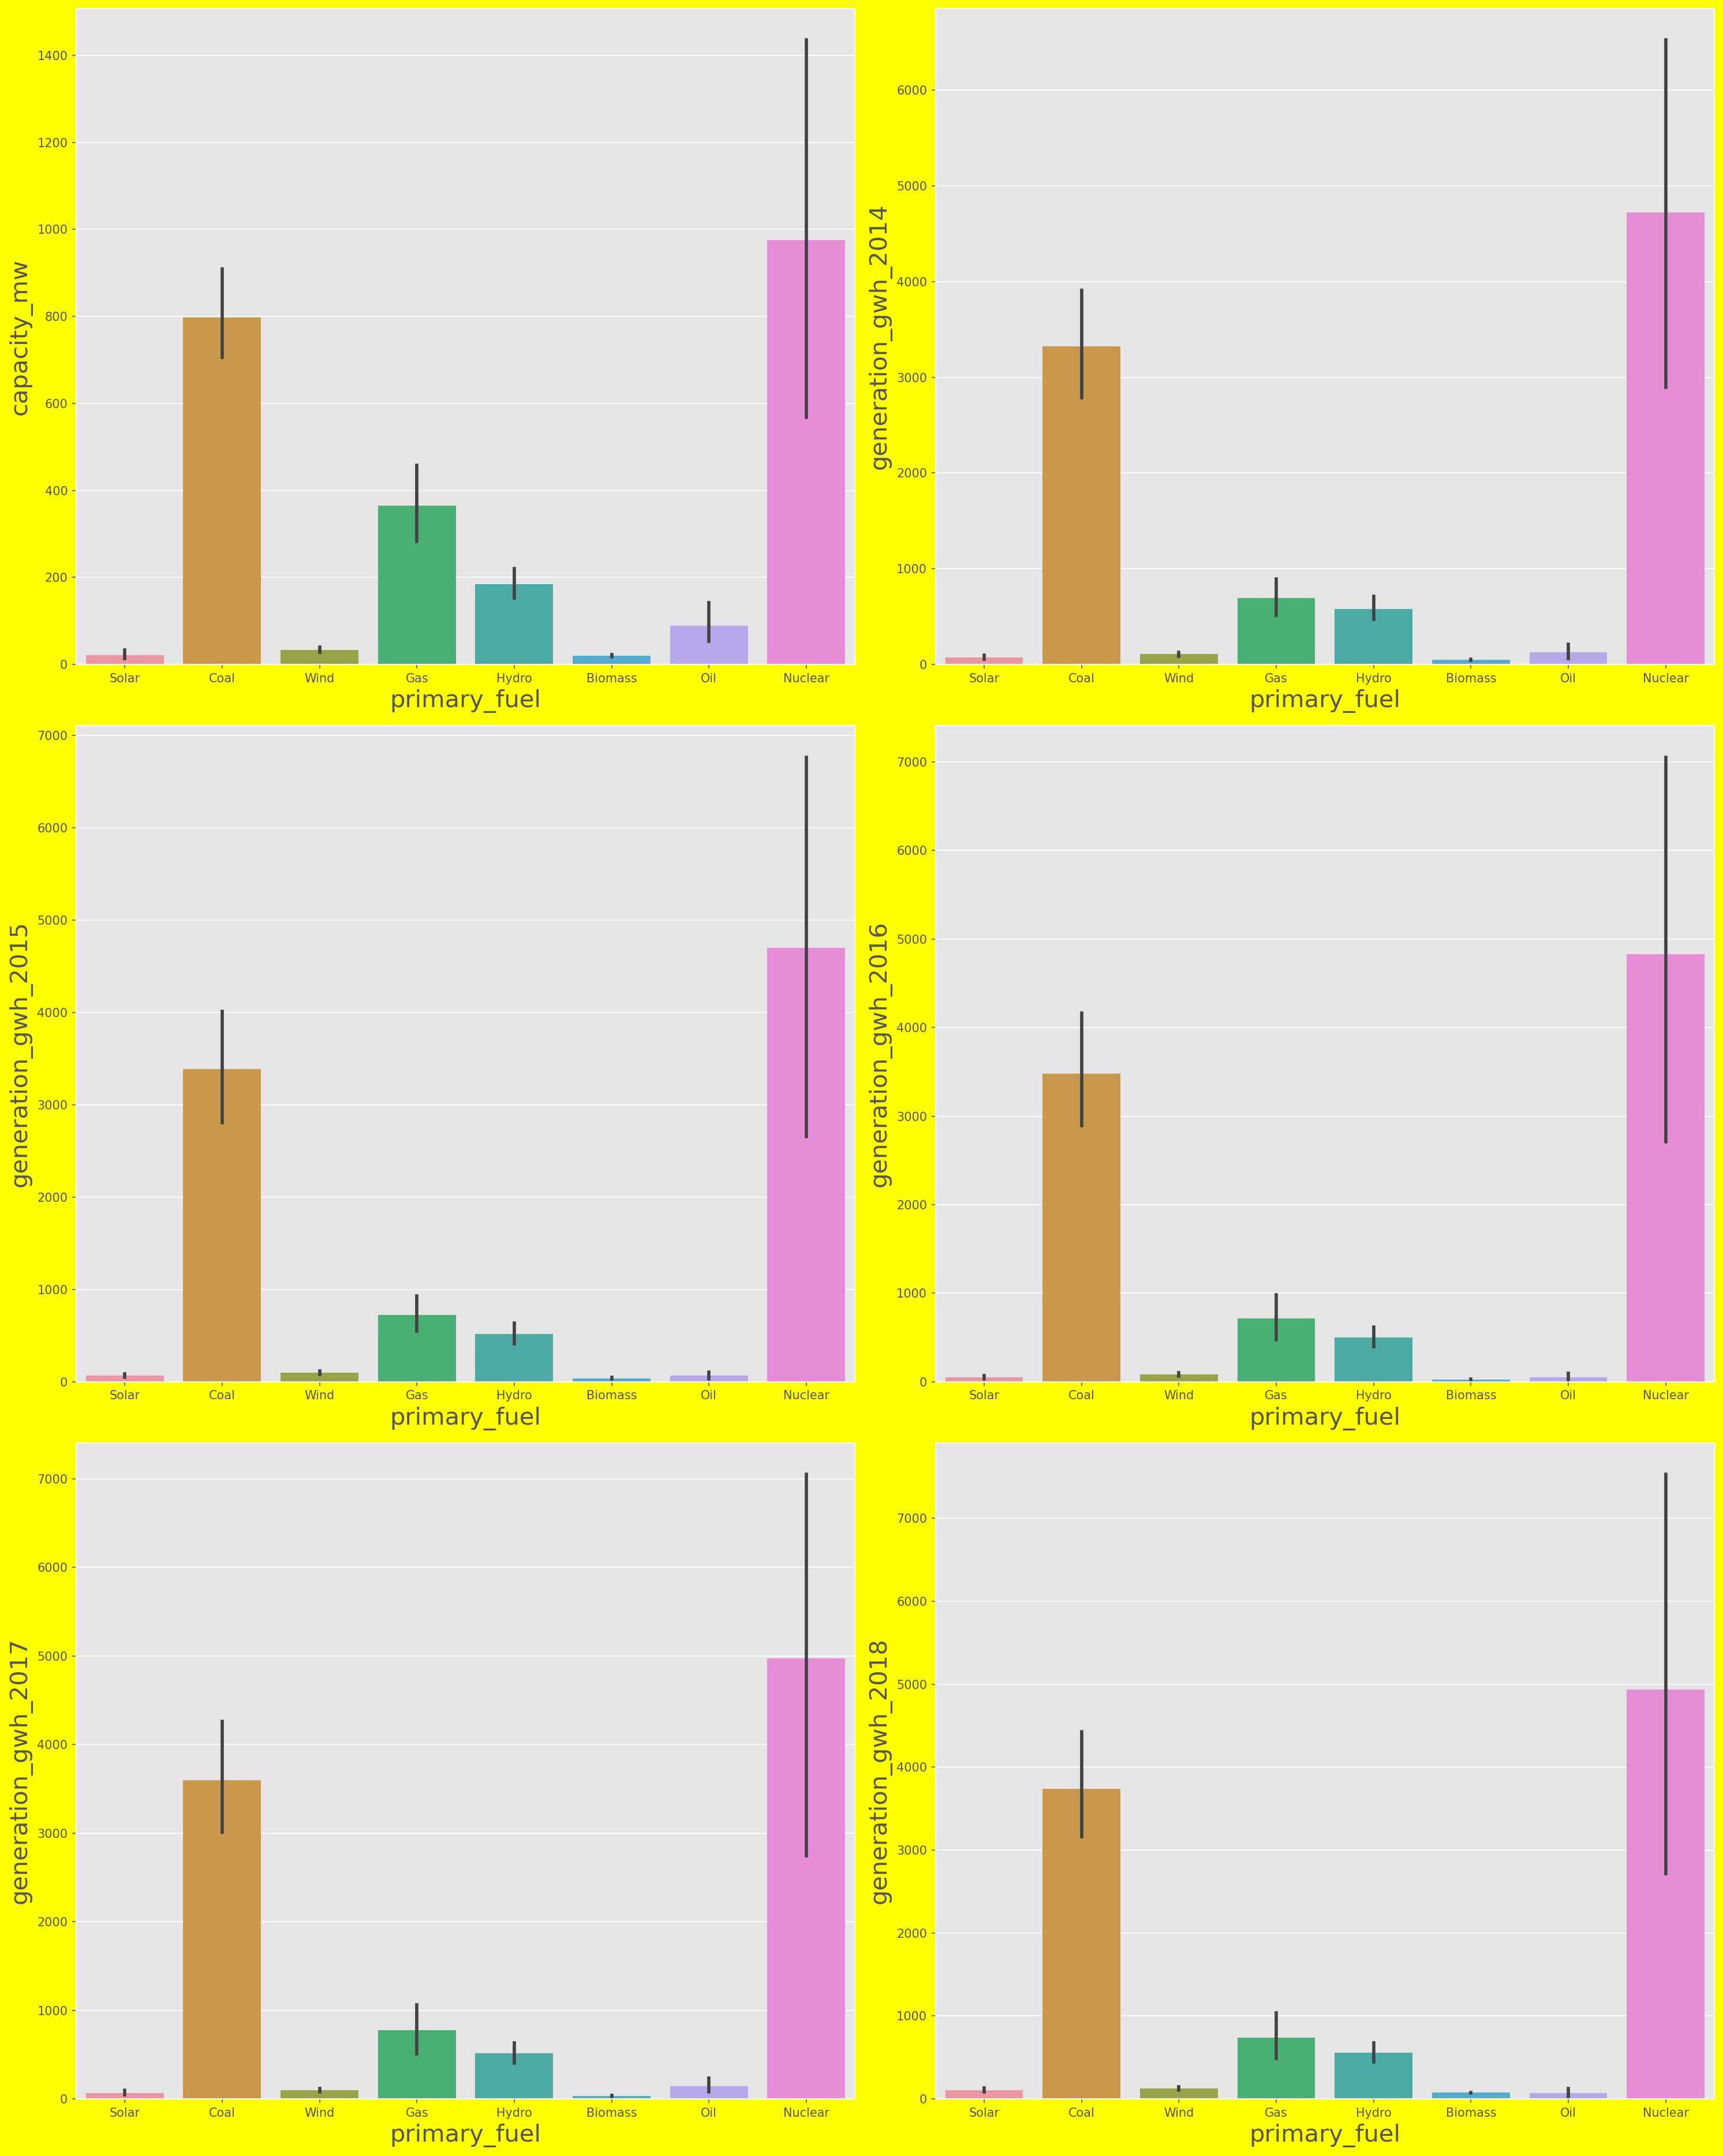

In [252]:
plt.figure(figsize=(20,25),facecolor='yellow',dpi=150)
plotnum=1
y = df['primary_fuel']
X =  df.drop(columns=['primary_fuel','geolocation_source','latitude','longitude'])
for col in X:
    if plotnum<=6:
        plt.subplot(3,2,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('primary_fuel',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

# comparison between 'primary_fuel' vs 'Categorical Data' Columns

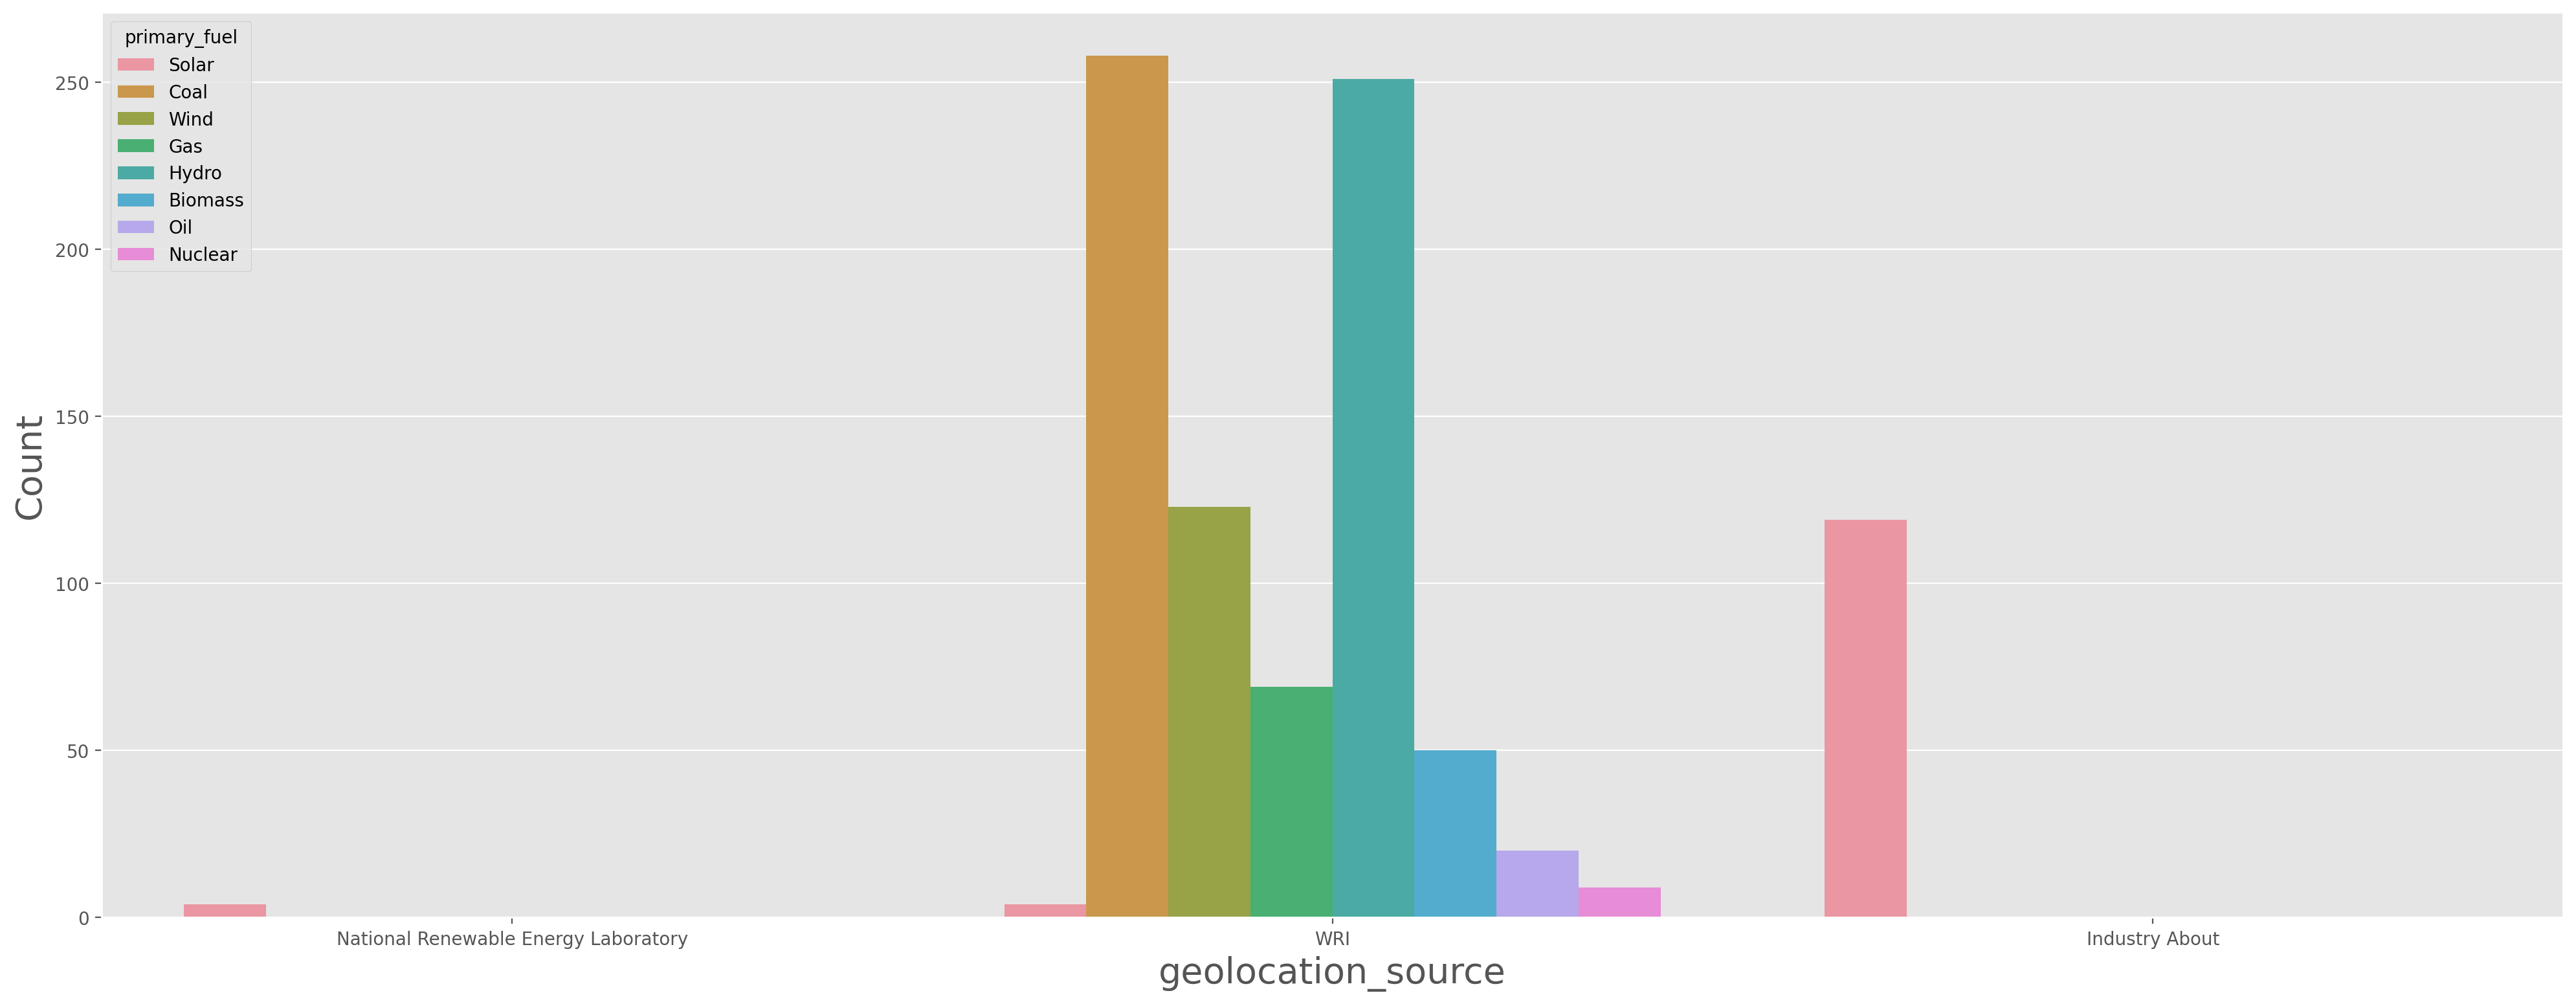

In [253]:
plt.figure(figsize=(20,15),facecolor='white',dpi=200)
plotnum=1
y = df['primary_fuel']
X =  df[['geolocation_source']]
for col in X:
    if plotnum<=2:
        plt.subplot(2,1,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

# most of the geolocation source are under WRI

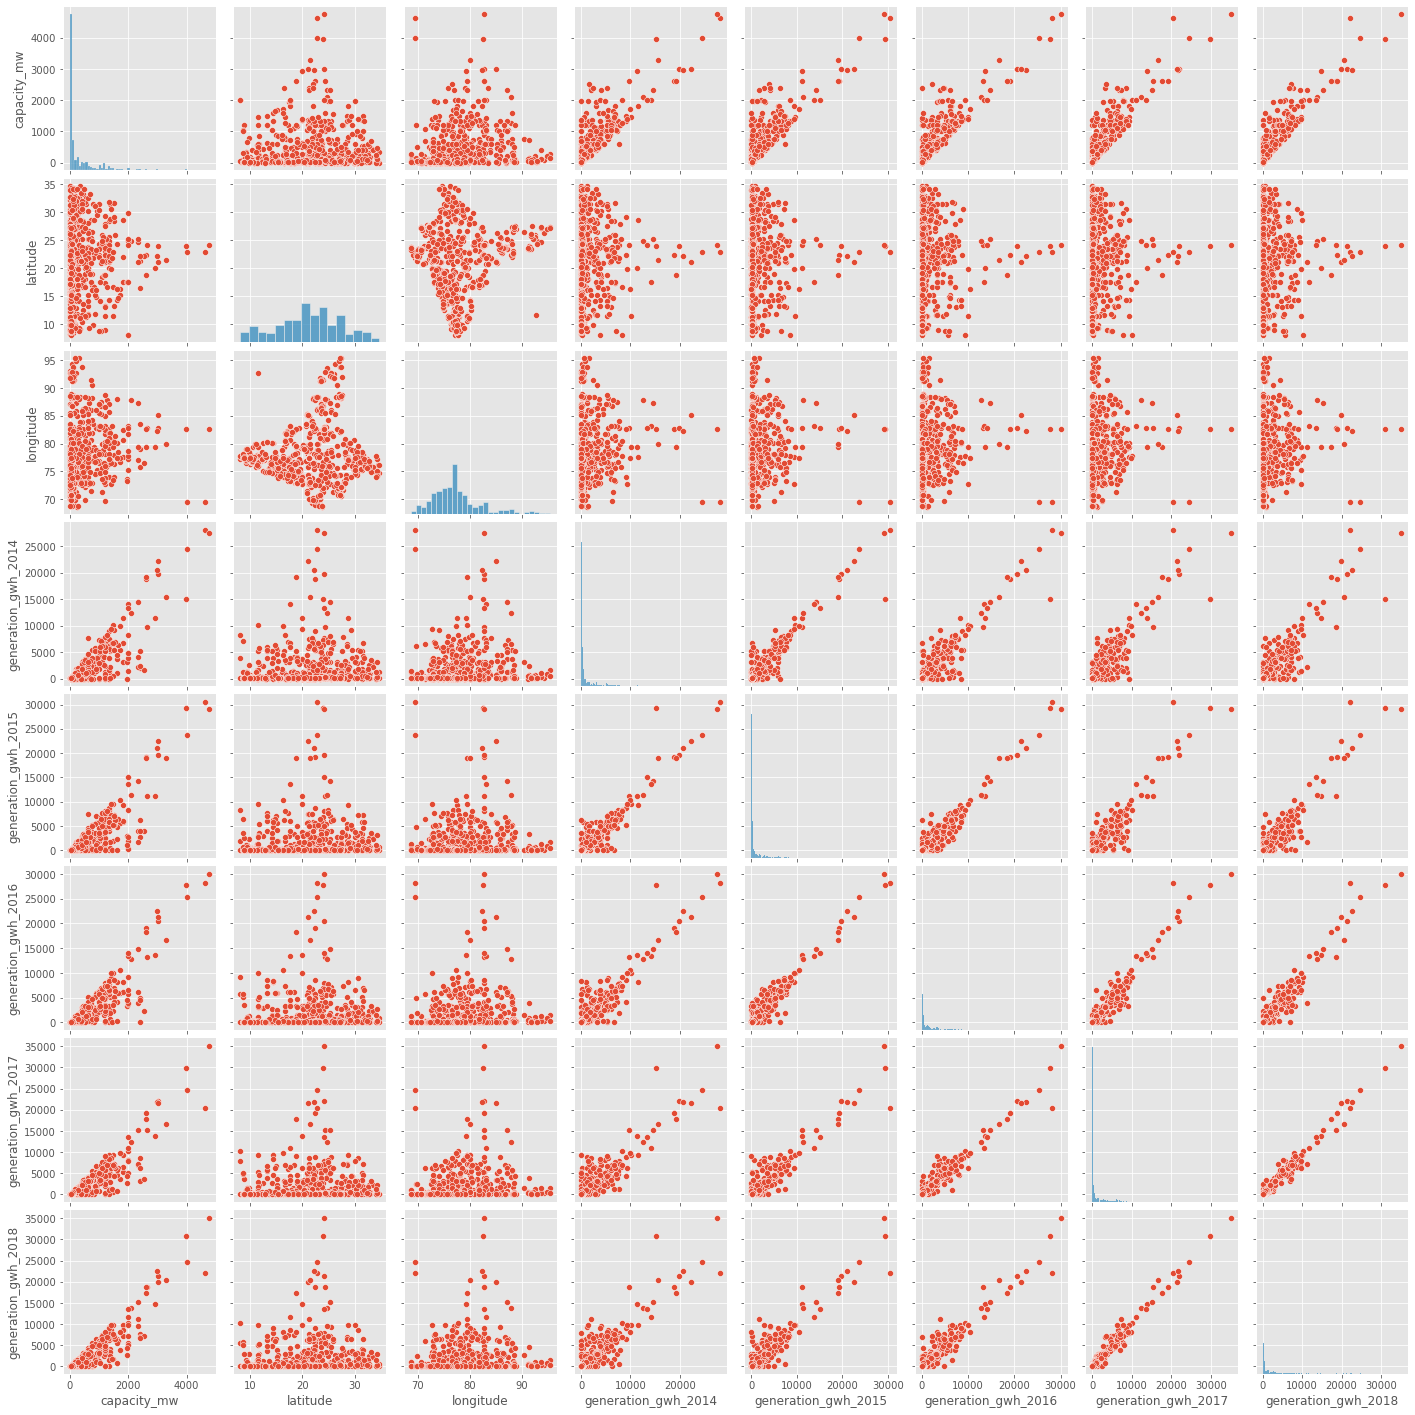

In [254]:
sns.pairplot(df)

# above graph is the overall summary of the relatioship among features and target variables

# NOW LETS CHECK FOR THE OUTLIERS AND HANNLE THEM PROPERLY

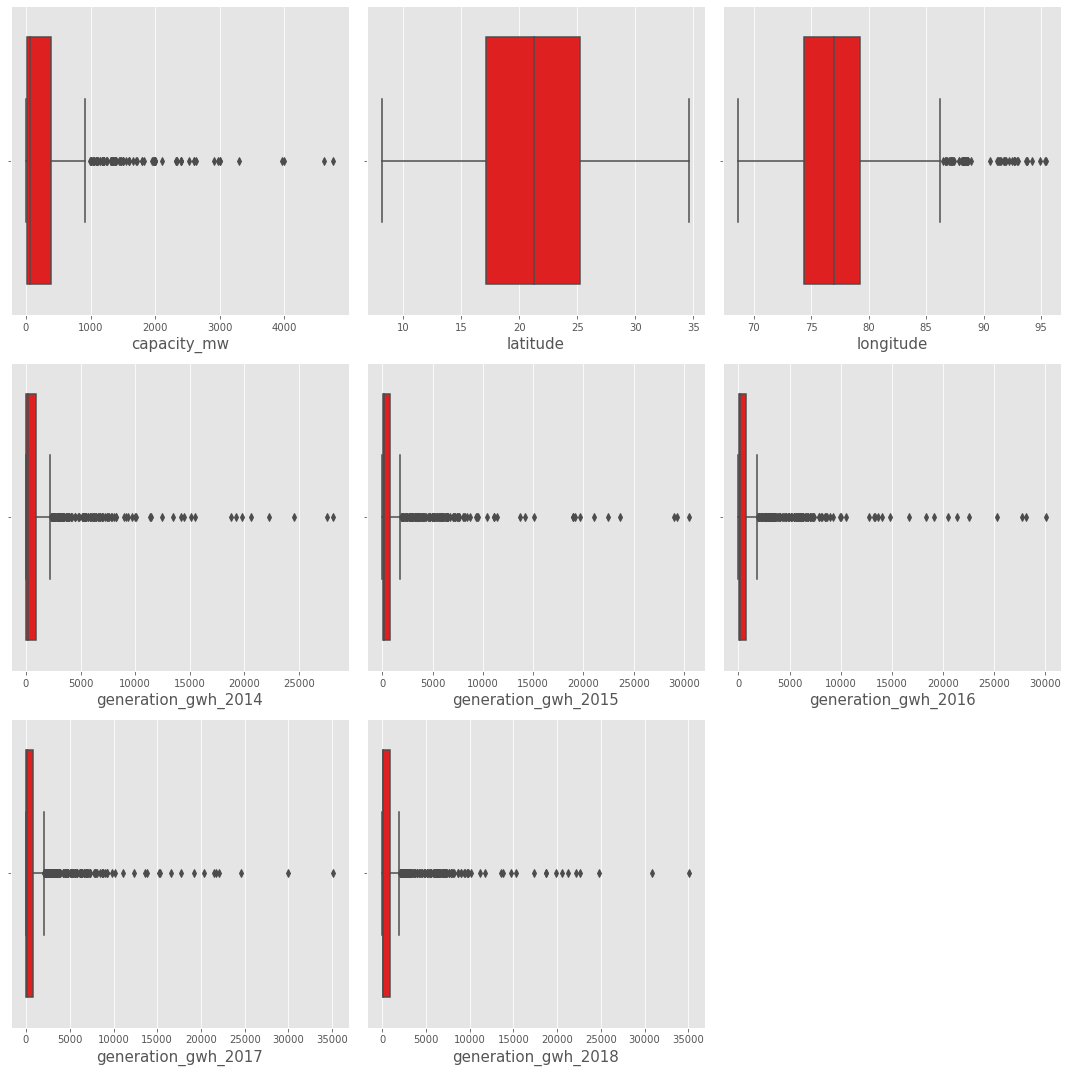

In [255]:
#Identifying the outliers in numerical columns
numerical_cols =  ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
plt.figure(figsize = (15,15))
plotnumber = 1

for column in numerical_cols:
    if plotnumber <= 9:
        ax = plt.subplot(3,3, plotnumber)
        sns.boxplot(df[column], color = 'red')
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1
plt.tight_layout()

# almost every column contains large number of outliers

In [256]:
#lets check skewness
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
generation_gwh_2014    4.773193
generation_gwh_2015    5.162402
generation_gwh_2016    4.935594
generation_gwh_2017    4.958680
generation_gwh_2018    4.847449
dtype: float64

there has been some skweness present as confirm by the above charts

# Removing outliers by using Z score method as iqr leads to heavy loss of data which is evident fron the box plot as huge amountof outliers exists.

In [257]:
df2 = df.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [258]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [259]:
print(df3.shape)
print(df2.shape)

(874, 7)
(907, 7)


In [260]:
#CALCULATING DATA LOSS
loss=(907-874)/907 * 100
loss

3.6383682469680267

data loss is only 3.6 percent which is within permissible range

In [261]:
dropindx = df.index.difference(df3.index)

In [262]:
#dropping the outliers from original features Dataframe
df.drop(dropindx,inplace = True)

In [263]:
df.shape

(874, 10)

In [264]:
df.skew()

capacity_mw            2.198395
latitude              -0.108394
longitude              0.929937
generation_gwh_2014    2.577772
generation_gwh_2015    2.557273
generation_gwh_2016    2.565113
generation_gwh_2017    2.478751
generation_gwh_2018    2.553172
dtype: float64

 skweness reduced from previous one but still exists.

# Reducing skewness further using PowerTransformer

In [265]:
from sklearn.preprocessing import PowerTransformer
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
df4 = df.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [266]:
transformed= powtrans.fit_transform(df4)

In [267]:
transformed = pd.DataFrame(transformed, columns=df4.columns)
transformed.skew()

latitude              -0.071360
longitude             -0.002241
generation_gwh_2014   -0.000399
generation_gwh_2015    0.006393
generation_gwh_2016    0.026492
generation_gwh_2017    0.004212
generation_gwh_2018    0.010067
dtype: float64

# skewness has been removed perfectly

In [268]:
transformed.index = df.index

In [269]:
df[['latitude','longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=transformed
df.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,1.161294,-0.945384,Solar,National Renewable Energy Laboratory,-0.796046,-0.873627,-0.783165,-0.569177,-0.751506
1,98.0,0.595110,-0.525180,Coal,WRI,0.315993,0.358279,0.059624,0.150150,0.326606
2,39.2,0.124253,-2.385519,Wind,WRI,0.028318,0.080897,0.001575,-0.184647,-0.123937
3,135.0,0.447526,2.437588,Gas,WRI,0.858674,0.915963,0.721839,0.558617,0.623988
4,1800.0,0.133515,1.244337,Coal,WRI,1.731827,1.674961,1.660784,1.920296,1.438915


In [270]:
df.shape

(874, 10)

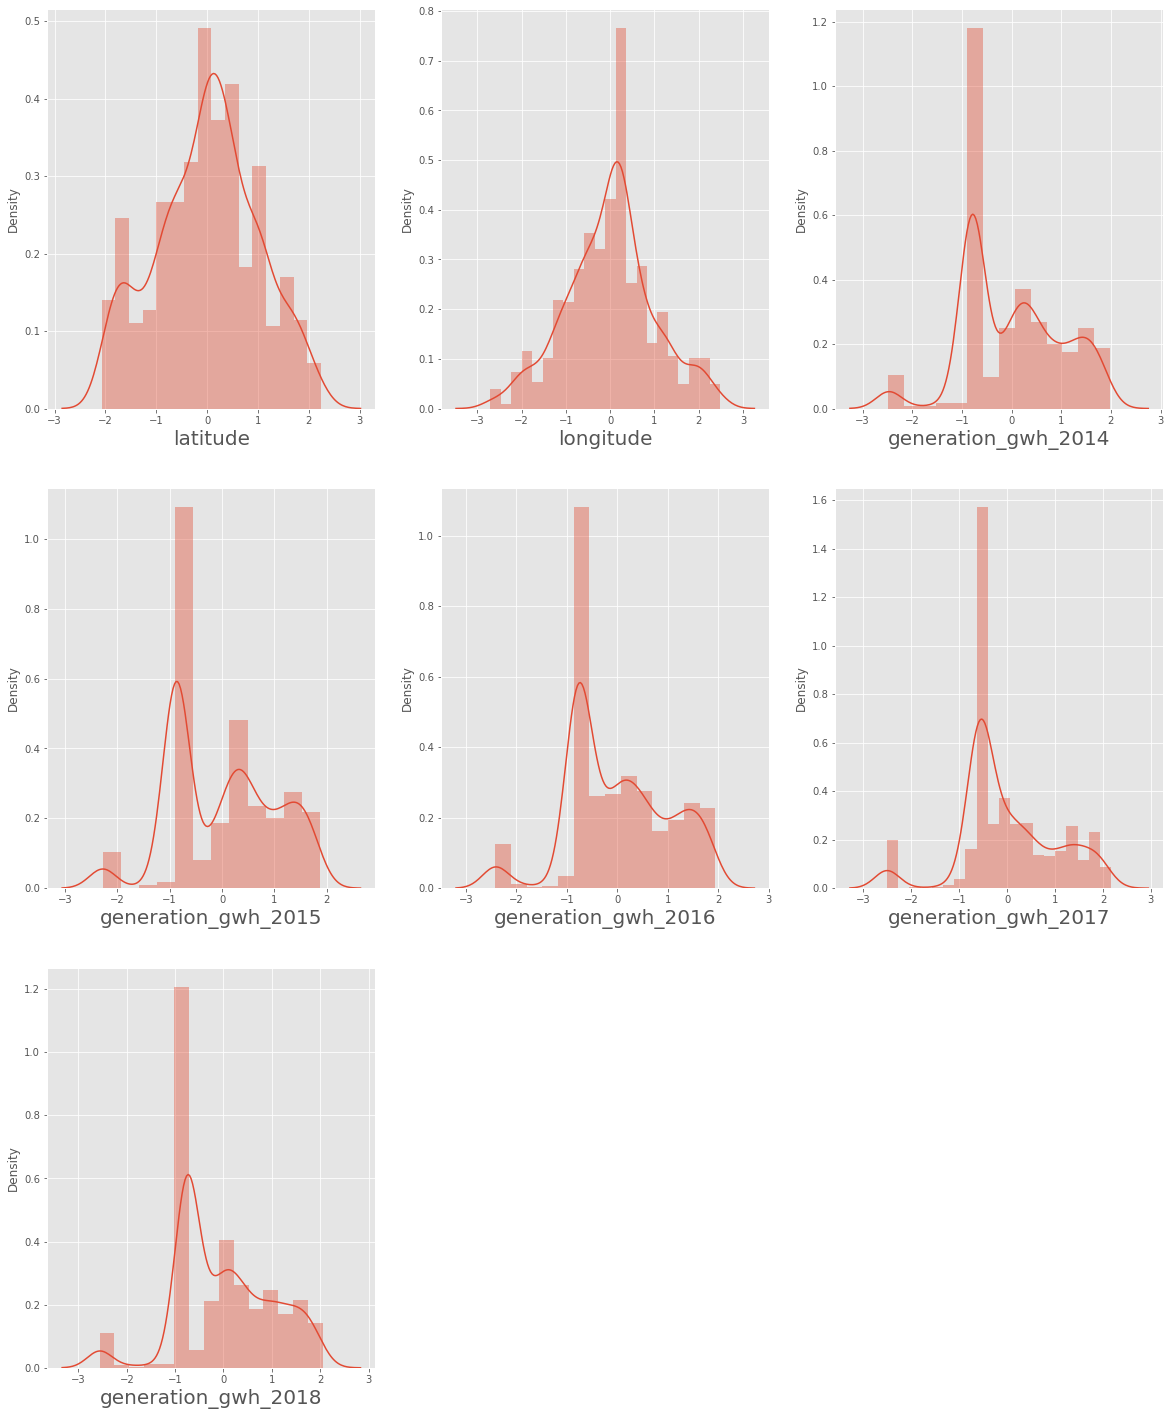

In [271]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns=['capacity_mw','primary_fuel','geolocation_source']):
    if plotnum<=9:
        plt.subplot(3,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Encoding the categorical columns using Label Encoder

In [272]:
from sklearn.preprocessing import LabelEncoder

In [273]:
#Will use Label Encoder to convert all catgorical columns to integer
lab_enc = LabelEncoder()

df[['primary_fuel','geolocation_source']] = df[['primary_fuel','geolocation_source']].apply(lab_enc.fit_transform)

In [274]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,1.161294,-0.945384,6,1,-0.796046,-0.873627,-0.783165,-0.569177,-0.751506
1,98.0,0.595110,-0.525180,1,2,0.315993,0.358279,0.059624,0.150150,0.326606
2,39.2,0.124253,-2.385519,7,2,0.028318,0.080897,0.001575,-0.184647,-0.123937
3,135.0,0.447526,2.437588,2,2,0.858674,0.915963,0.721839,0.558617,0.623988
4,1800.0,0.133515,1.244337,1,2,1.731827,1.674961,1.660784,1.920296,1.438915


In [275]:
#Checking the correlation between features and target
corr = df.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.040776,0.248880,-0.397682,0.228114,0.632170,0.665040,0.668150,0.668820,0.618128
latitude,0.040776,1.000000,-0.063883,0.001288,-0.199015,0.111149,0.143240,0.128395,0.142682,0.114066
longitude,0.248880,-0.063883,1.000000,-0.404541,0.302633,0.218143,0.277760,0.255334,0.240290,0.240598
primary_fuel,-0.397682,0.001288,-0.404541,1.000000,-0.479124,-0.355324,-0.387359,-0.341383,-0.323464,-0.351058
geolocation_source,0.228114,-0.199015,0.302633,-0.479124,1.000000,0.268907,0.293846,0.262402,0.202059,0.259244
generation_gwh_2014,0.632170,0.111149,0.218143,-0.355324,0.268907,1.000000,0.892335,0.778422,0.768750,0.822877
generation_gwh_2015,0.665040,0.143240,0.277760,-0.387359,0.293846,0.892335,1.000000,0.879923,0.859637,0.820243
generation_gwh_2016,0.668150,0.128395,0.255334,-0.341383,0.262402,0.778422,0.879923,1.000000,0.899169,0.757364
generation_gwh_2017,0.668820,0.142682,0.240290,-0.323464,0.202059,0.768750,0.859637,0.899169,1.000000,0.748707
generation_gwh_2018,0.618128,0.114066,0.240598,-0.351058,0.259244,0.822877,0.820243,0.757364,0.748707,1.000000


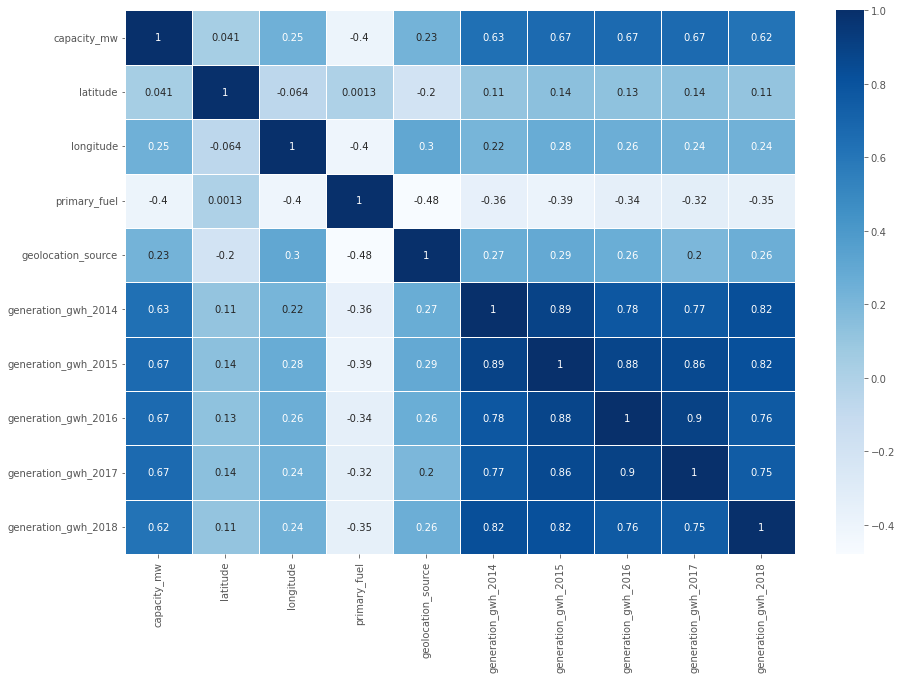

In [276]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,linewidth=1,  cmap='Blues')
plt.show()

from the above we conclude that generation_gwh_2017 has strong correlation with generation_gwh_2016.
also all generation_gwh features has more or less strong relation with each other and its obvious as power generation 
capacity will high chance to get increased in next year as comparison to previous year.

# Visualizing the correlation between features and target Capacity_mw

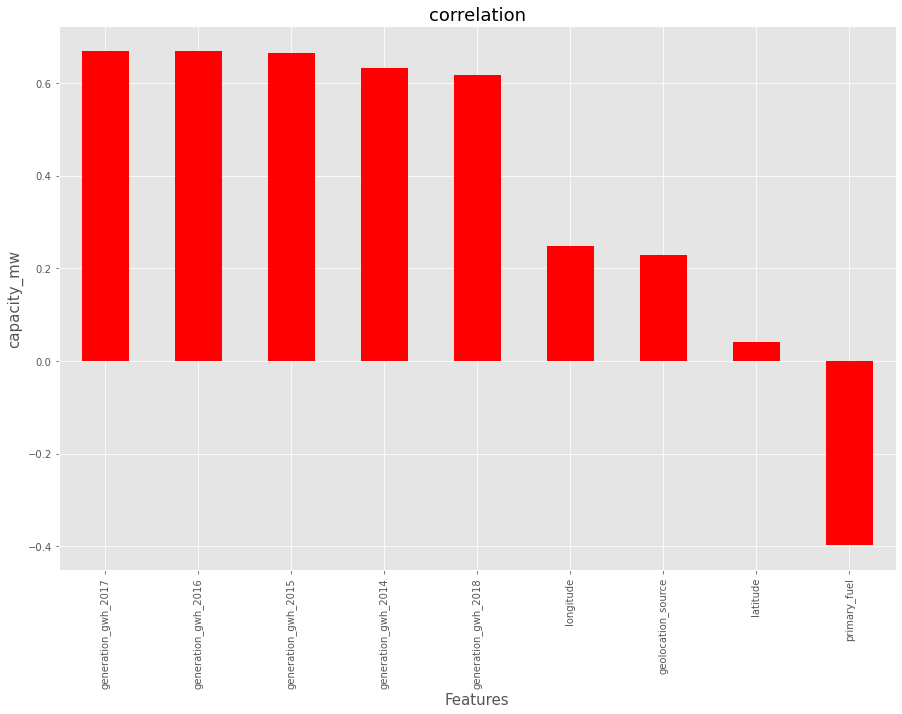

In [277]:
plt.figure(figsize = (15,10))
df.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color = 'r')
plt.xlabel('Features',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

# Analysing the correlation between features and target Primery Fuel

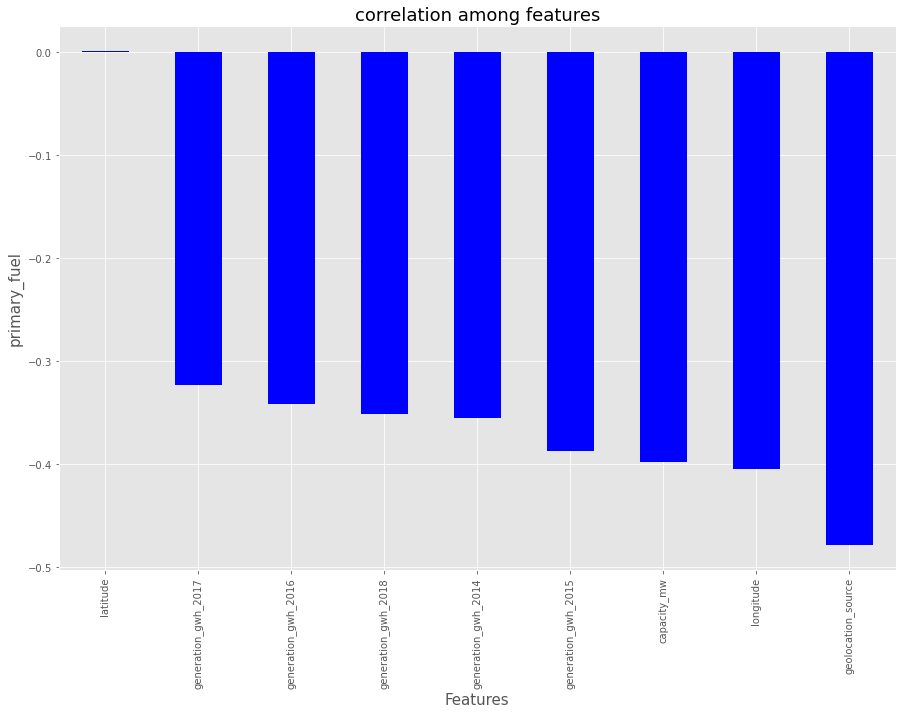

In [278]:
plt.figure(figsize = (15,10))
df.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind='bar',color = 'b')
plt.xlabel('Features',fontsize=15)
plt.ylabel('primary_fuel',fontsize=15)
plt.title('correlation among features',fontsize = 18)
plt.show()

we can drop latitude as its score is very less in contribution to prediction as evident from above plot

In [279]:
#Droping other_fuel1 and latitude
df.drop(columns = ['latitude'], axis = 1, inplace = True)

In [280]:
df.head(2)

,capacity_mw,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,-0.945384,6,1,-0.796046,-0.873627,-0.783165,-0.569177,-0.751506
1,98.0,-0.525180,1,2,0.315993,0.358279,0.059624,0.150150,0.326606


# 1. Perdiction by using regression method for Capacity_mw

In [281]:
x = df.drop('capacity_mw', axis = 1)
y = df['capacity_mw']

In [282]:
x.shape

(874, 8)

In [283]:
y.shape

(874,)

# Applying standard scaler

In [284]:
#Scaling data using standrd scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x.head()

,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.945384,1.195185,-1.058987,-0.796046,-0.873627,-0.783165,-0.569177,-0.751506
1,-0.525180,-0.981047,0.400878,0.315993,0.358279,0.059624,0.150150,0.326606
2,-2.385519,1.630431,0.400878,0.028318,0.080897,0.001575,-0.184647,-0.123937
3,2.437588,-0.545801,0.400878,0.858674,0.915963,0.721839,0.558617,0.623988
4,1.244337,-0.981047,0.400878,1.731827,1.674961,1.660784,1.920296,1.438915


In [285]:
# Checking multicollinearity problem using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]

vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.248554,longitude
1,1.535519,primary_fuel
2,1.366603,geolocation_source
3,5.685988,generation_gwh_2014
4,9.455809,generation_gwh_2015
5,6.876338,generation_gwh_2016
6,6.023897,generation_gwh_2017
7,3.614688,generation_gwh_2018


 column generation_gwh_2015 has muticollinearity  so we can proceed ahead with dropping that features

In [286]:
#Droping generation_gwh_2015 column
x = x.drop(columns = ['generation_gwh_2015'])

#Scaling x data after removing column generation_gwh_2015
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]

vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.240869,longitude
1,1.530730,primary_fuel
2,1.362253,geolocation_source
3,3.880297,generation_gwh_2014
4,6.013026,generation_gwh_2016
5,5.746979,generation_gwh_2017
6,3.548975,generation_gwh_2018


In [287]:
scaler= StandardScaler()
scaled_x = scaler.fit_transform(x)

# Spliting data into train and test and using Regression Model Building

In [288]:
#Import train test split
from sklearn.model_selection import train_test_split

#Importing Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing Evaluation metrics for Regression models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [289]:
#Train Test Split / finding best random_state for my model
LR = LinearRegression()

for i in range(0,150):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x, y ,random_state = i,test_size = 0.2)
    LR.fit(x_train,y_train)
    train_pred = LR.predict(x_train)
    test_pred = LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2) == round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X' * 50,'\n')

At random state  28 The model performance very well
At random state:  28
Test R2 score is:  0.52
Train R2 score is:  0.52
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  68 The model performance very well
At random state:  68
Test R2 score is:  0.52
Train R2 score is:  0.52
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  119 The model performance very well
At random state:  119
Test R2 score is:  0.52
Train R2 score is:  0.52
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  139 The model performance very well
At random state:  139
Test R2 score is:  0.52
Train R2 score is:  0.52
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  148 The model performance very well
At random state:  148
Test R2 score is:  0.52
Train R2 score is:  0.52
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [290]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(scaled_x, y,random_state = 68,test_size = 0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [291]:
#Regression models
LR_model = LinearRegression()
RD_model = Ridge()
LS_model = Lasso()
DT_model = DecisionTreeRegressor()
SV_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
XGB_model = XGBRegressor()
Elastic_model = ElasticNet()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
ADA_model = AdaBoostRegressor()
GB_model = GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [292]:
#Checking R2, MAE, MSE, RMSE and CV score for all model
for m in model:
    m.fit(x_train,y_train)
    print('MAE of ',m ,'model', mean_absolute_error(y_test, m.predict(x_test)))
    print('MSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test)))
    print('RMSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test), squared = False))
    print('Training R2 Score of',m,'model', r2_score(y_train, m.predict(x_train)) * 100)
    print('Test R2 Score of',m,'model', r2_score(y_test, m.predict(x_test)) * 100)
    print("cross Validation score of ", m," is ",cross_val_score(m, scaled_x, y, cv = 10).mean())
    print('X' * 50, '\n\n')

MAE of  LinearRegression() model 241.98597085559658
MSE of LinearRegression() model 127430.43532379575
RMSE of LinearRegression() model 356.9739981060186
Training R2 Score of LinearRegression() model 51.517998157055864
Test R2 Score of LinearRegression() model 51.80283817227913
cross Validation score of  LinearRegression()  is  0.447726422792927
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Ridge() model 241.98724861584387
MSE of Ridge() model 127446.52377496273
RMSE of Ridge() model 356.9965318808612
Training R2 Score of Ridge() model 51.51798273178333
Test R2 Score of Ridge() model 51.796753144926896
cross Validation score of  Ridge()  is  0.4480028893213891
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Lasso() model 241.97288889981493
MSE of Lasso() model 127528.26722105281
RMSE of Lasso() model 357.11100126018636
Training R2 Score of Lasso() model 51.51508711734587
Test R2 Score of Lasso() model 51.76583586767246
cross Validation score of  Lasso()  i

cross Validation score of  AdaBoostRegressor()  is  0.6373874066090889
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  GradientBoostingRegressor() model 97.26900703891775
MSE of GradientBoostingRegressor() model 40977.746686721184
RMSE of GradientBoostingRegressor() model 202.42960921446542
Training R2 Score of GradientBoostingRegressor() model 97.30565611096223
Test R2 Score of GradientBoostingRegressor() model 84.50126075943453
cross Validation score of  GradientBoostingRegressor()  is  0.8102639621611015
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 




# my best model is RANDOM FOREST as it shows more than 87 percent r2 test score.

# HyperParameter Tuning the Random Forest Regressor

In [293]:
#Let's tune the parameters using GridsearchCv
params = {'n_estimators': [20,100,200],
          'max_depth': [ 2,3,5],
          'max_features': [ 1, 'auto', 'sqrt'],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 3, 5]}

GCV = GridSearchCV(RFR_model, params, cv = 10, scoring = 'r2', n_jobs = -1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5],
                         'max_features': [1, 'auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 100, 200]},
             scoring='r2')

In [294]:
GCV.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [295]:
GCV_pred = GCV.best_estimator_.predict(x_test)
r2_score(y_test, GCV_pred)

0.8695096814162819

In [296]:
best_model = GCV.best_estimator_

In [297]:
#Saving the best model to the local file system
#Import pickle
import pickle
filename = 'final_model.pickle'
pickle.dump(best_model, open('Globalpower_model', 'wb'))

In [298]:
#Loading saved model
loaded_model = pickle.load(open('Globalpower_model','rb'))

In [299]:
#Prediction using saved model
conclusion = loaded_model.predict(x_test)
conclusion

array([  68.41640293,   96.25726678,  128.54134622,  551.52496229,
         17.75992924,   17.75992924,   17.75992924,   17.75992924,
        317.88098039, 1813.42106176,  106.61474485,   43.68931153,
         37.28994949,   46.49830766,  297.55204198, 1202.0503804 ,
         17.75992924,   17.75992924, 1644.50351874,   17.75992924,
         17.75992924, 1763.55743834, 1544.53027193,  667.21796268,
        106.85405635,   17.75992924,   17.75992924,  108.29275232,
         39.51868888,   50.90027705,  264.20313745,   17.75992924,
         66.25186253,  118.90092775,   42.58548319,  105.62822995,
        124.13020802,   93.45482021,   17.75992924,  348.25327533,
         46.49830766,   90.88874783,  230.31249904, 1424.65751031,
         46.49830766,  557.79900343,  500.7436797 ,   17.75992924,
         17.75992924, 1501.27361723,   17.75992924,   71.13519297,
       1537.9149332 ,   46.49830766,   17.75992924,  535.99917862,
        282.50399493,   17.75992924,  113.47801886, 1120.00723

In [300]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
DF = pd.DataFrame({'Actual Capacity': y_test, 'Predicted Capacity': conclusion})
DF.head()

,Actual Capacity,Predicted Capacity
130,40.0,68.416403
92,75.0,96.257267
62,90.0,128.541346
295,427.5,551.524962
874,19.8,17.759929


Text(0.5, 1.0, 'Original vs predicted  graph')

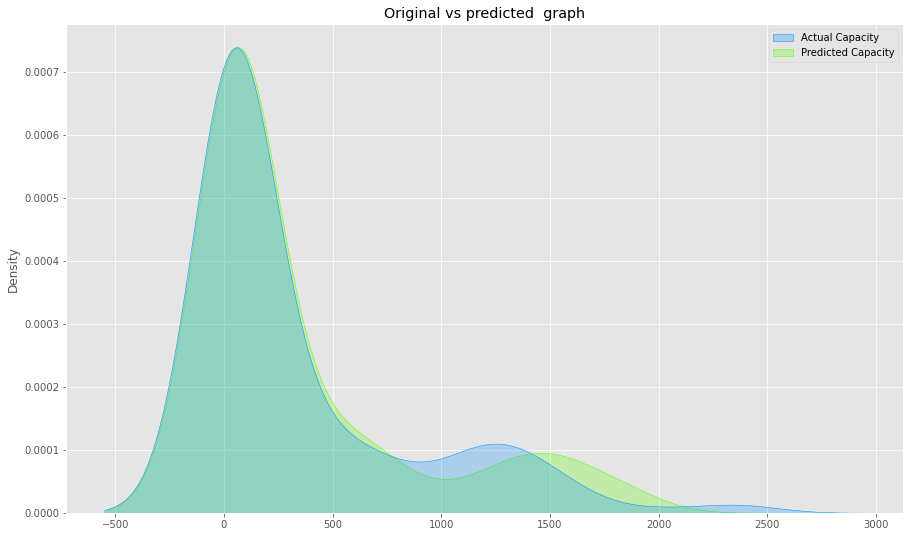

In [301]:
plt.figure(figsize=(15,9))
sns.kdeplot(data=DF, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

# 2. Perdiction for Primary Fuel USING CLASSIFICATION METHOD 

In [302]:
X = df.drop('primary_fuel', axis = 1)
Y = df['primary_fuel']

In [303]:
print(X.shape)
print(Y.shape)

(874, 8)
(874,)


In [304]:
#Checking for skewness
X.skew()

capacity_mw            2.198395
longitude             -0.002241
geolocation_source    -2.111270
generation_gwh_2014    0.006393
generation_gwh_2015    0.026492
generation_gwh_2016    0.004212
generation_gwh_2017    0.010067
generation_gwh_2018   -0.000399
dtype: float64

In [306]:
#Will remove remaining skewness by using Power Tranform
PT = PowerTransformer(method = 'yeo-johnson')
transform1 = PT.fit_transform(X)

In [307]:
transformed1 = pd.DataFrame(transform1)
transformed1.columns = X.columns

In [308]:
transformed1.skew()

capacity_mw            0.019588
longitude              0.007095
geolocation_source    -2.084243
generation_gwh_2014   -0.078062
generation_gwh_2015   -0.035437
generation_gwh_2016   -0.089470
generation_gwh_2017   -0.161564
generation_gwh_2018   -0.108803
dtype: float64

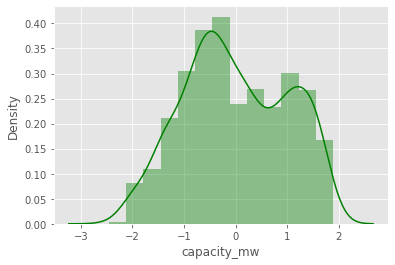

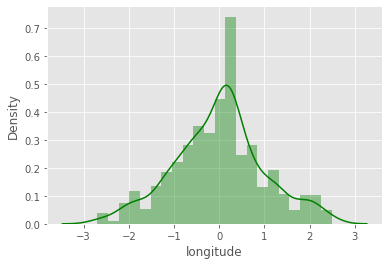

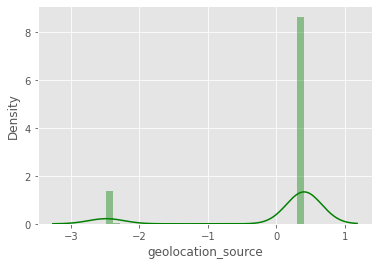

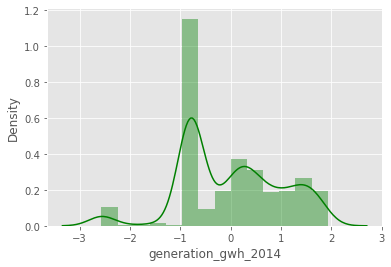

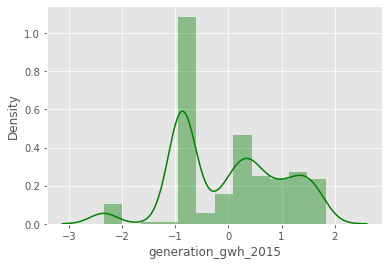

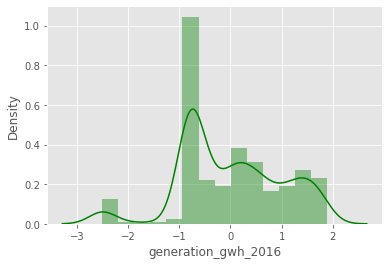

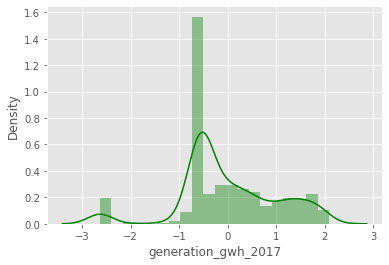

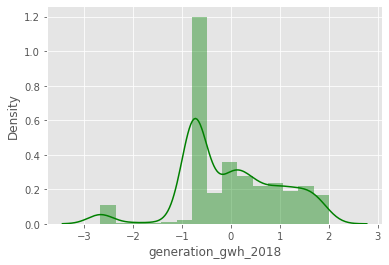

In [309]:
#Checking data distribution after removing skewness.
for i in transformed1.columns:
    plt.figure()
    sns.distplot(transformed1[i], color = 'g')
    
plt.show()

In [310]:
#Scaling data using standrd scaler
x_scaled = pd.DataFrame(scaler.fit_transform(transformed1), columns = transformed1.columns)
x_scaled

,capacity_mw,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.684537,-0.945376,-2.290892,-0.790837,-0.870951,-0.777210,-0.553549,-0.744353
1,0.231687,-0.526260,0.402748,0.332907,0.374193,0.080055,0.175651,0.344934
2,-0.264063,-2.378935,0.402748,0.047603,0.099538,0.022100,-0.159600,-0.103225
3,0.402816,2.444490,0.402748,0.862447,0.918121,0.730251,0.574981,0.635541
4,1.729444,1.245386,0.402748,1.697714,1.645544,1.628199,1.857550,1.417062
...,...,...,...,...,...,...,...,...
869,1.671462,0.204817,0.402748,-2.175166,0.376977,0.847091,0.622175,1.609315
870,-1.603794,0.395392,-2.489007,-0.790837,-0.870951,-0.777210,-0.767316,-0.744353
871,-0.498401,-0.251839,0.402748,-0.790837,-0.870951,-0.777210,-0.553549,-0.744353
872,0.122597,-0.785365,0.402748,0.307053,0.436428,0.387609,0.268417,0.219768


In [311]:
# Checking multicollinearity problem using VIF
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x_scaled.values,i)
              for  i in range(len(x_scaled.columns))]

vif['features'] = x_scaled.columns

# let's check the values
vif

,VIF values,features
0,3.174928,capacity_mw
1,1.175062,longitude
2,1.358485,geolocation_source
3,5.535483,generation_gwh_2014
4,9.618887,generation_gwh_2015
5,6.700457,generation_gwh_2016
6,5.855580,generation_gwh_2017
7,3.593505,generation_gwh_2018


In [325]:
# Checking multicollinearity problem using VIF
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x_scaled.values,i)
              for  i in range(len(x_scaled.columns))]

vif['features'] = x_scaled.columns

# let's check the values
vif

,VIF values,features
0,2.849578,capacity_mw
1,1.125442,longitude
2,1.354740,geolocation_source
3,8.865837,generation_gwh_2014
4,11.132302,generation_gwh_2015
5,5.938484,generation_gwh_2016
6,7.019961,generation_gwh_2017
7,5.110021,generation_gwh_2018


# Oversampling

In [326]:
from imblearn.over_sampling import SMOTE as smt

In [327]:
smt = SMOTE()

In [328]:
x_scaled, Y = smt.fit_resample(x_scaled, Y)

In [329]:
Y.value_counts()

6    241
1    241
7    241
2    241
3    241
0    241
5    241
4    241
Name: primary_fuel, dtype: int64

In [330]:
pca = PCA()
principle_comp = pca.fit_transform(x_scaled)

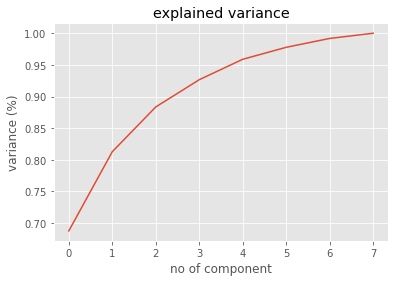

In [331]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

In [332]:
pca = PCA(n_components = 6)

In [333]:
x1 = pca.fit_transform(x_scaled)

In [334]:
x1

array([[ 2.23410197,  2.44793289,  0.60151916,  0.10729295, -0.09503513,
        -0.00939491],
       [-0.78888958,  0.01154598, -0.50635895, -0.03163872, -0.18830984,
         0.10790256],
       [ 0.10419086,  0.91050206, -2.01391746, -0.45124452, -0.02965997,
         0.172424  ],
       ...,
       [ 1.61195108, -0.01227969, -0.53574363, -0.54826317, -0.22873817,
        -0.05156403],
       [-0.16184787,  0.82084927, -1.88475636, -0.32313215, -0.0778386 ,
         0.18887709],
       [ 1.72874238, -0.10610345,  0.4983754 , -1.05148016, -0.76709283,
        -0.09287843]])

In [336]:
#Find best Random_state
maxaccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x1, Y, random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.6217616580310881 on Random State = 120


In [337]:
#Training model best random state = 64
x_train,x_test,y_train,y_test = train_test_split(x1, Y, test_size = 0.2, random_state = 120)

In [338]:
#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report

In [339]:
Lr_model = LogisticRegression()
Rd_model = RidgeClassifier()
Dt_model = DecisionTreeClassifier()
Sv_model = SVC()
KNN_model = KNeighborsClassifier()
RfR_model = RandomForestClassifier()
XGBoost_model = XGBClassifier()
SgH_model = SGDClassifier()
Bagging_model = BaggingClassifier()
ADAB_model = AdaBoostClassifier()
GBoost_model = GradientBoostingClassifier()

model = [Lr_model,Rd_model,Dt_model,Sv_model,KNN_model,RfR_model,XGBoost_model,SgH_model,Bagging_model,ADAB_model,GBoost_model]

In [340]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred = m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 62.17616580310881
Confusion Matrix of  LogisticRegression()  is 
 [[54  0  0  1  0  0  0  8]
 [ 3 11  8  7 10  2  0  4]
 [ 1  7 20  7  3  3  0  5]
 [ 9  6  4 16  0  1  0  4]
 [ 0  4  0  0 38  1  0  0]
 [ 3  0  1  3  0 30  0  6]
 [ 0  0  0  1  0  0 52  0]
 [17  1  1  8  0  7  0 19]]
              precision    recall  f1-score   support

           0       0.62      0.86      0.72        63
           1       0.38      0.24      0.30        45
           2       0.59      0.43      0.50        46
           3       0.37      0.40      0.39        40
           4       0.75      0.88      0.81        43
           5       0.68      0.70      0.69        43
           6       1.00      0.98      0.99        53
           7       0.41      0.36      0.38        53

    accuracy                           0.62       386
   macro avg       0.60      0.61      0.60       386
weighted avg       0.61      0.62      0.61       386

***********************

Accuracy_Score of  BaggingClassifier() is 78.23834196891191
Confusion Matrix of  BaggingClassifier()  is 
 [[60  0  0  2  0  0  0  1]
 [ 3 18  7 11  3  1  0  2]
 [ 1  1 36  5  0  2  0  1]
 [ 3  9  3 19  0  4  0  2]
 [ 0  1  0  0 41  1  0  0]
 [ 0  1  0  0  1 41  0  0]
 [ 0  0  0  0  0  0 53  0]
 [ 4  2  0  9  0  4  0 34]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        63
           1       0.56      0.40      0.47        45
           2       0.78      0.78      0.78        46
           3       0.41      0.47      0.44        40
           4       0.91      0.95      0.93        43
           5       0.77      0.95      0.85        43
           6       1.00      1.00      1.00        53
           7       0.85      0.64      0.73        53

    accuracy                           0.78       386
   macro avg       0.77      0.77      0.76       386
weighted avg       0.78      0.78      0.78       386

*************************

In [341]:
#Checking Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i, x1, Y, cv = 5, scoring = 'accuracy').mean() * 100)
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 62.17616580310881
cross Validation accuracy score of  LogisticRegression()  is  54.148442231343786
**************************************************
Accuracy_Score of  RidgeClassifier() is 51.813471502590666
cross Validation accuracy score of  RidgeClassifier()  is  51.606621357916694
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 80.82901554404145
cross Validation accuracy score of  DecisionTreeClassifier()  is  76.92066482740059
**************************************************
Accuracy_Score of  SVC() is 68.65284974093264
cross Validation accuracy score of  SVC()  is  64.67842002557028
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 77.46113989637306
cross Validation accuracy score of  KNeighborsClassifier()  is  73.96393244061638
**************************************************
Accuracy_Score of  RandomForestClassifier() is 83.93782383419

In [342]:
#Model Confidence/Accuracy

def metric_score(RfR_model,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = RfR_model.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = RfR_model.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [343]:
#Call the function and pass dataset to check train and test score.
metric_score(RfR_model,x_train,x_test,y_train,y_test,train = True)
metric_score(RfR_model,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 99.87%

====================================Test Result================================
Accurancy Score: 83.94%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        63
           1       0.78      0.56      0.65        45
           2       0.89      0.87      0.88        46
           3       0.54      0.55      0.54        40
           4       0.93      0.95      0.94        43
           5       0.86      0.98      0.91        43
           6       0.98      1.00      0.99        53
           7       0.82      0.75      0.78        53

    accuracy                           0.84       386
   macro avg       0.83      0.83      0.83       386
weighted avg       0.84      0.84      0.83       386



# HYPERTUNING THE RANDOM FOREST MODEL AS IT PROVIDES THE BEST RESULT

In [344]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[10,12,15],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_leaf':[5,6],
    'min_samples_split':[10,12],
}
grd = GridSearchCV(RfR_model, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 12}


In [345]:
RFR_models = grd.best_estimator_
RFR_models.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=12)

In [346]:
#Call the function and pass dataset to check train and test score.
metric_score(RFR_models,x_train,x_test,y_train,y_test,train = True)
metric_score(RFR_models,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 88.85%

====================================Test Result================================
Accurancy Score: 78.50%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88        63
           1       0.86      0.40      0.55        45
           2       0.67      0.72      0.69        46
           3       0.45      0.45      0.45        40
           4       0.91      0.95      0.93        43
           5       0.74      1.00      0.85        43
           6       1.00      0.98      0.99        53
           7       0.80      0.70      0.75        53

    accuracy                           0.78       386
   macro avg       0.78      0.77      0.76       386
weighted avg       0.79      0.78      0.77       386



# althogh the accuracy score has decreased but i consider this model as the best and save it

# Saving Model

In [347]:
#Saving the best model to the local file system
filename = 'final_model.pickle'
pickle.dump(RfR_model, open('power_model', 'wb'))

In [348]:
#Loading saved model
loaded_model = pickle.load(open('power_model','rb'))

In [349]:
final = loaded_model.predict(x_test)
final

array([7, 5, 0, 4, 1, 4, 6, 4, 7, 5, 5, 1, 0, 4, 4, 0, 0, 2, 6, 4, 2, 0,
       0, 0, 0, 1, 0, 1, 3, 3, 5, 0, 6, 2, 0, 7, 6, 7, 1, 0, 2, 7, 6, 7,
       5, 0, 3, 6, 4, 3, 2, 1, 7, 5, 5, 5, 0, 2, 2, 1, 2, 5, 3, 6, 6, 7,
       5, 6, 7, 0, 3, 5, 0, 7, 0, 4, 4, 5, 6, 7, 0, 7, 2, 3, 0, 1, 0, 0,
       0, 7, 6, 0, 1, 7, 0, 6, 6, 4, 4, 7, 3, 0, 4, 0, 5, 4, 2, 7, 0, 0,
       5, 5, 7, 5, 3, 7, 2, 2, 7, 1, 3, 4, 0, 5, 4, 3, 5, 7, 2, 3, 6, 2,
       5, 0, 4, 5, 0, 1, 7, 6, 3, 6, 1, 7, 0, 3, 1, 6, 0, 5, 3, 0, 0, 4,
       5, 5, 6, 2, 4, 7, 2, 4, 0, 6, 4, 5, 4, 0, 3, 7, 4, 2, 1, 6, 0, 4,
       5, 5, 0, 0, 6, 5, 6, 4, 0, 4, 0, 5, 2, 7, 4, 6, 7, 6, 3, 0, 7, 0,
       4, 7, 3, 7, 0, 0, 6, 6, 1, 7, 0, 4, 0, 0, 0, 3, 0, 7, 6, 4, 2, 6,
       7, 0, 7, 0, 3, 0, 3, 5, 6, 4, 2, 4, 0, 7, 7, 5, 7, 6, 2, 7, 3, 0,
       4, 1, 6, 3, 7, 3, 1, 0, 4, 0, 4, 7, 3, 6, 4, 4, 6, 1, 0, 6, 2, 4,
       7, 1, 7, 5, 7, 5, 6, 2, 2, 0, 3, 3, 3, 7, 4, 3, 5, 1, 0, 0, 0, 1,
       5, 2, 5, 2, 5, 2, 1, 6, 5, 2, 0, 6, 6, 2, 1,

In [351]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
powerplant = pd.DataFrame({'Actual Fuel Type': y_test, 'Predicted Fuel Type': final})
powerplant.head(10)

,Actual Fuel Type,Predicted Fuel Type
293,7,7
607,1,5
913,0,0
1412,4,4
759,1,1
492,4,4
1711,6,6
1454,4,4
1669,5,7
96,1,5


Text(0.5, 1.0, 'Original vs predicted  graph')

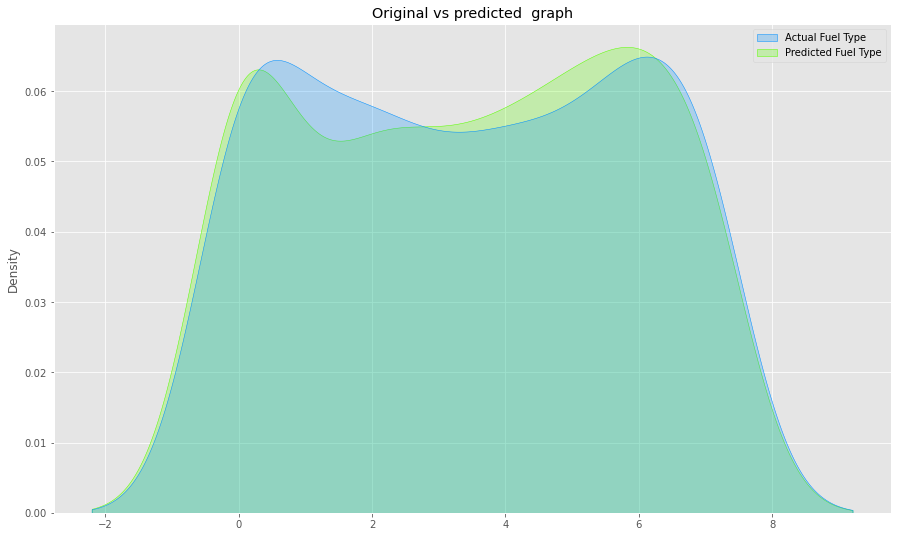

In [352]:
plt.figure(figsize=(15,9))
sns.kdeplot(data=powerplant, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')